<a href="https://colab.research.google.com/github/ChecinskiBartlomiej/UM/blob/main/UM_hw_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Working with Other Loss Functions**

-------------------------------

During the class today, we reconstructed an **ellipse**. The ellipse was defined with two **foci** and $C$ (the sum of distances of the ellipse points from the foci).

To reconstruct the ellipse through optimization, we began with **$N$ points** scattered randomly in the 2D plane. Our goal was to adjust their positions so that they satisfy the elliptical constraint as closely as possible. We achieved this by minimizing the **error-related loss**, $L^{(2)}_{\text{ellipse}}$ which was defined in today's class with $\ell_2$ norm as:

$$
L^{(2)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} \epsilon_i^2
$$

where
$$
 \epsilon_i = d_{i1} + d_{i2} - C
$$
where $N$ is the number of points, and $d_{i1}, d_{i2}$ are their distances to the two foci.

In the homework assignment you will experiment with 3 other loss definitions based on some other possible norms.



1. $\ell_0$ norm resulting in
  $$
  L^{(0)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{1}(\epsilon_i \neq 0)
  $$
  - If you actually succeed to code this loss function, the question for you to answer in relation to $L^{(0)}_{\text{ellipse}}$ is why the training is not progressing with passing epochs.
  - If you actually fail to code this loss function, the question for you to answer is to explain the failure and reason out theoretically, why the training would not be progressing with passing epochs, anyway.

1. $\ell_1$ norm resulting in
  $$
  L^{(1)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} |\epsilon_i|
  $$
  The question for you to answer in relation to $L^{(1)}_{\text{ellipse}}$ is why the training loss doesn't converge, even after the ellipse has been fully drawn.

1. $\ell_\infty$ norm resulting in
  $$
  L^{(\infty)}_{\text{ellipse}} =  \max_{i} |\epsilon_i|
  $$
  The question for you to answer in relation to $L^{(\infty)}_{\text{ellipse}}$ is why the training takes so long and it doesn't converge in the end, either.

## **Points to Note**

1. Draw both the shape that the points draw as they move, and the loss value after each epoch, just as we did in class today.

2. Note, that the purpose of this excercise is not that you reconstruct a perfect ellipse, but rather that you give it a try, and even if you fail you should document and explain the failure, and answer a question related to a given loss definition.

3. You can also play around with the learning rate to try to improve convergence.

## **Task & Deliverables**
  
   - Document your experiments (python code and charts) and **write down your conclusions** into the Colab notebook.
   - It is not strictly required, but **if you make a movie showing the optimization progress it will be considered a strong point of your solution**
     - You can make a movie programmatically as we did in clustering class (our second class) with EM clustering,
     - or, you can save to disk the image files with epoch charts and use an external tool to bind them into a movie. Provide links to movie files in the README.
   - Place the Colab notebook  with the solution in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook (and any movies you created) and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




In [7]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def plot_results(loss_name, epoch, trajectories, loss_history=None):
    if loss_history is not None:
      fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    else:
      fig, axes = plt.subplots(1, 1, figsize=(6, 6))
      axes = [axes]
    points = np.array([trajectories[i][-1] for i in range(num_points)])
    # Left plot: Scatter of points with trajectories
    axes[0].scatter(points[:, 0], points[:, 1], label=f'Points - Epoch {epoch}')
    f1 = focus1.detach().cpu().numpy()
    f2 = focus2.detach().cpu().numpy()
    axes[0].scatter([f1[0], f2[0]], [f1[1], f2[1]], color='red', marker='x', s=100, label='Foci')

    # Draw movement traces
    for i in range(num_points):
        trajectory = np.array(trajectories[i])
        axes[0].plot(trajectory[:, 0], trajectory[:, 1], color='gray', linestyle='-', linewidth=0.5)

    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    axes[0].legend()


    axes[0].grid()

    if loss_history is not None:
      axes[0].set_title(f'{loss_name}, points after Epoch {epoch}')
      # Right plot: Loss history
      axes[1].plot(loss_history, color='blue')
      axes[1].set_xlabel("Epoch")
      axes[1].set_ylabel("Loss")
      axes[1].set_title("Loss Convergence")
      axes[1].grid()
    else:
      axes[0].set_title(f'Points before Epoch {epoch}')

    plt.show()



[Epoch 0] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn


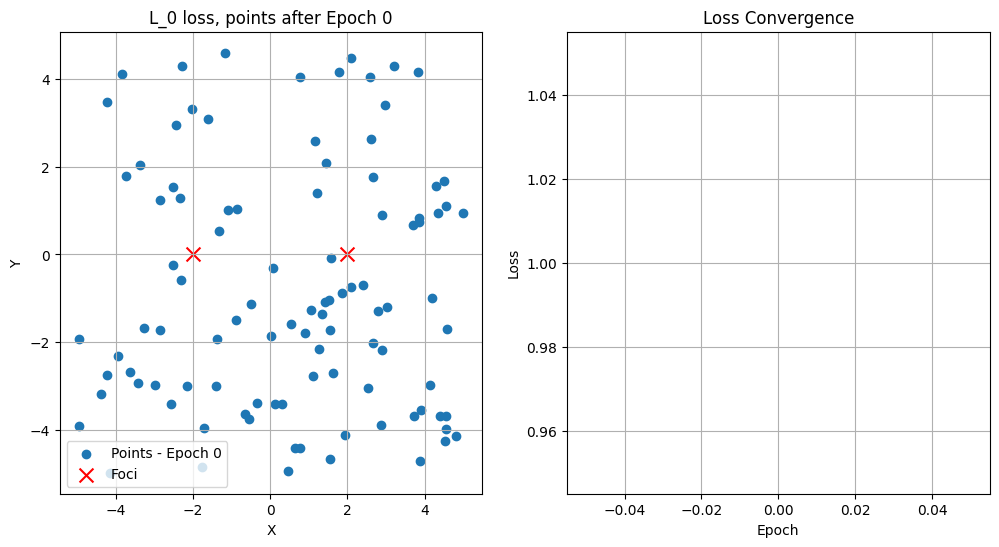

Epoch 0: Loss = 1.000000


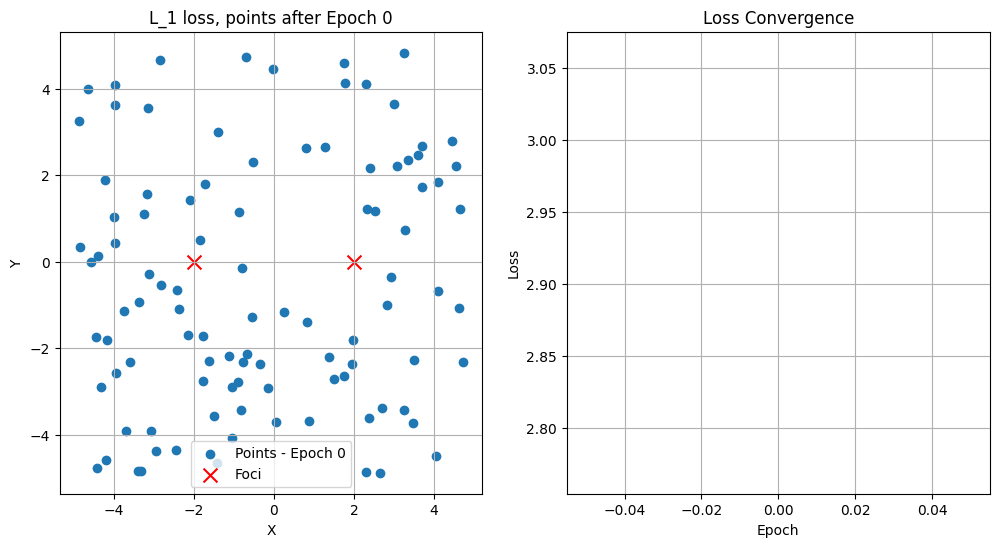

Epoch 0: Loss = 2.914691


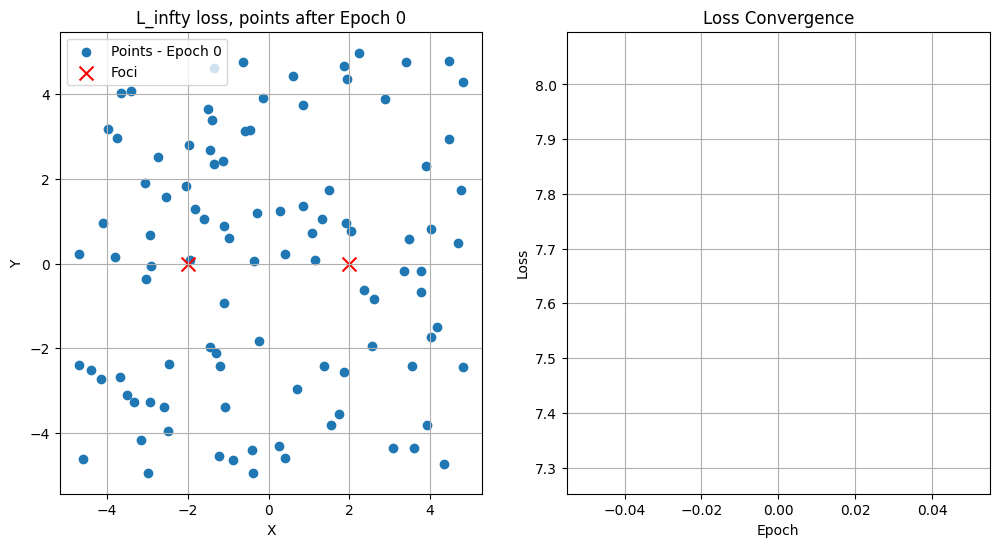

Epoch 0: Loss = 7.674279
[Epoch 1] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 2] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 3] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 4] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 5] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 6] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 7] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 8] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 9] Nie można policzyć gradientu: element 0 of tensors does not require grad and 

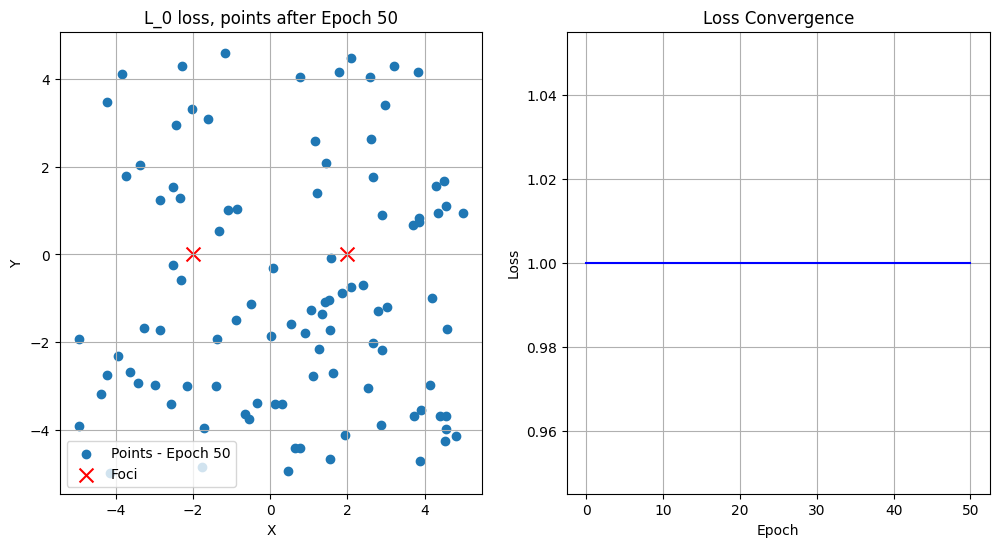

Epoch 50: Loss = 1.000000


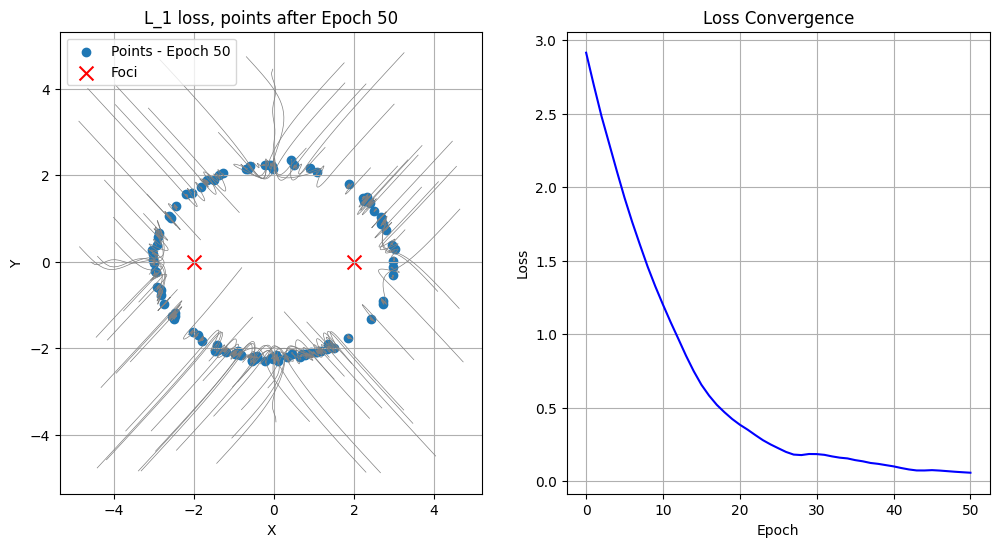

Epoch 50: Loss = 0.057335


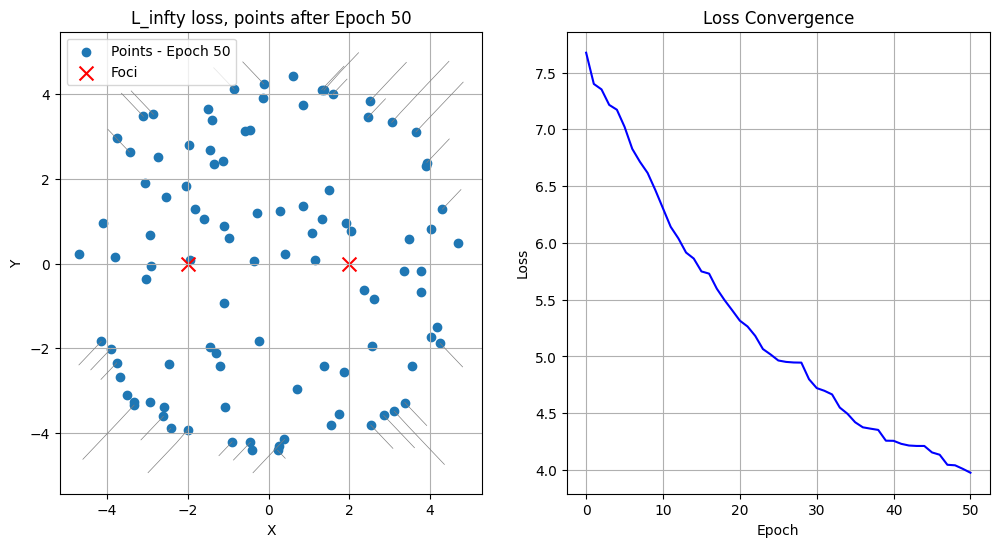

Epoch 50: Loss = 3.976410
[Epoch 51] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 52] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 53] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 54] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 55] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 56] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 57] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 58] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 59] Nie można policzyć gradientu: element 0 of tensors does not require

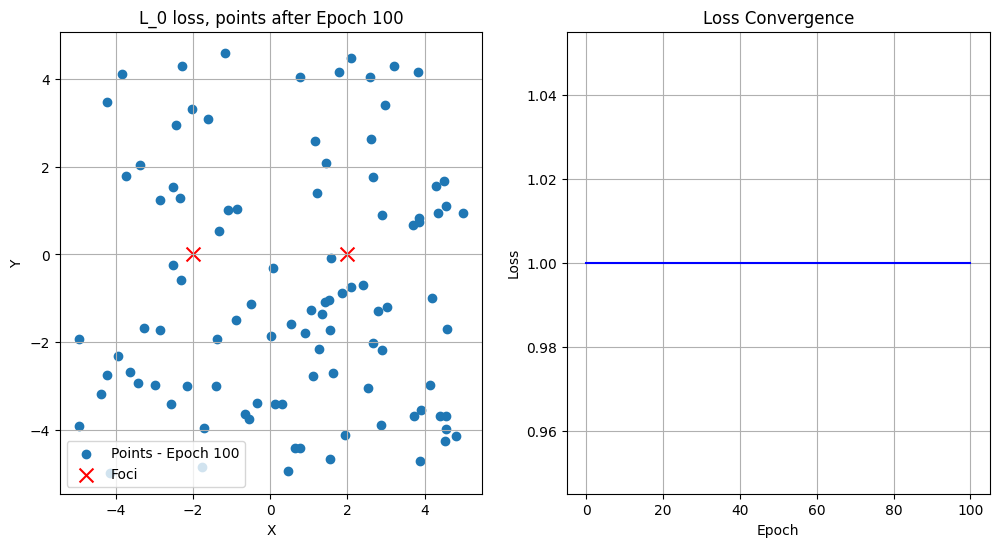

Epoch 100: Loss = 1.000000


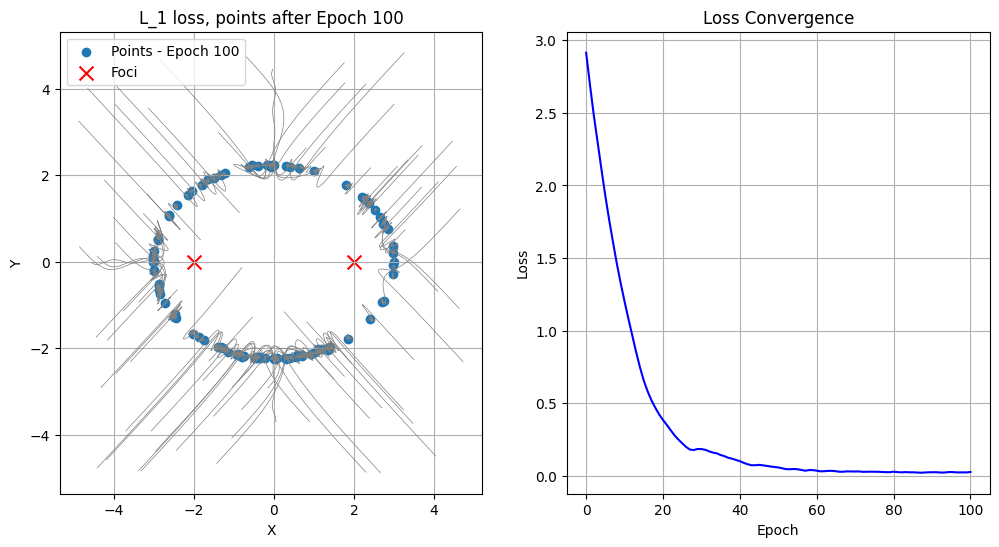

Epoch 100: Loss = 0.026074


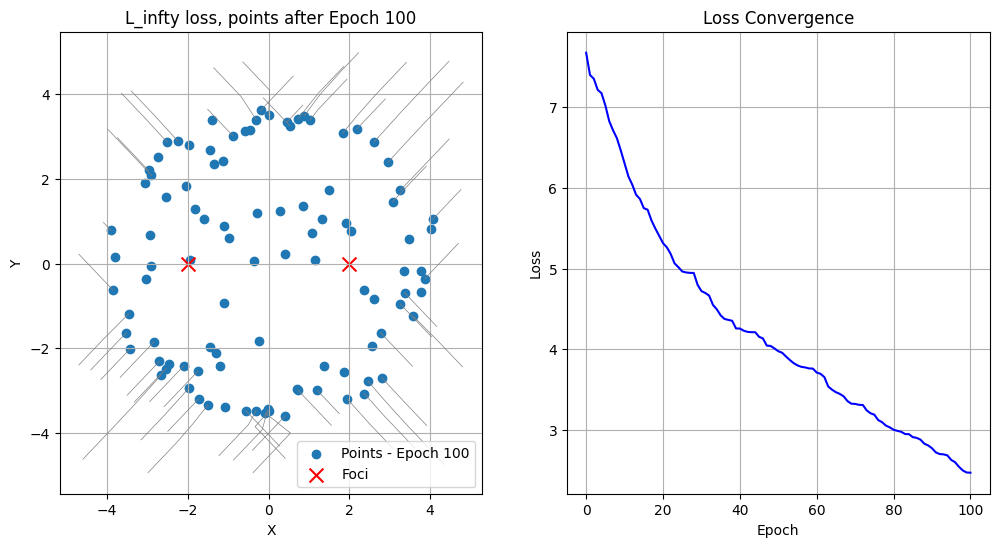

Epoch 100: Loss = 2.471096
[Epoch 101] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 102] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 103] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 104] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 105] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 106] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 107] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 108] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 109] Nie można policzyć gradientu: element 0 of tensors does n

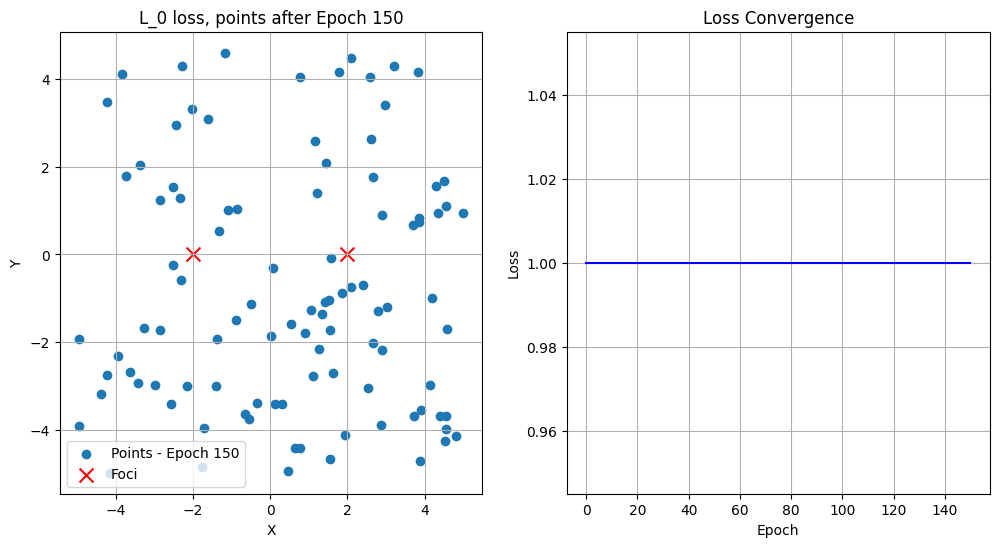

Epoch 150: Loss = 1.000000


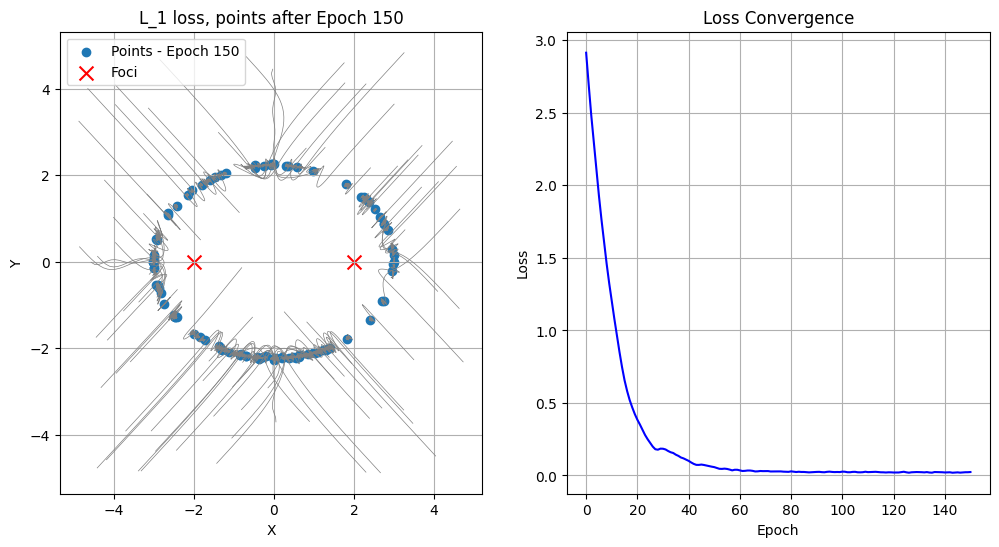

Epoch 150: Loss = 0.023346


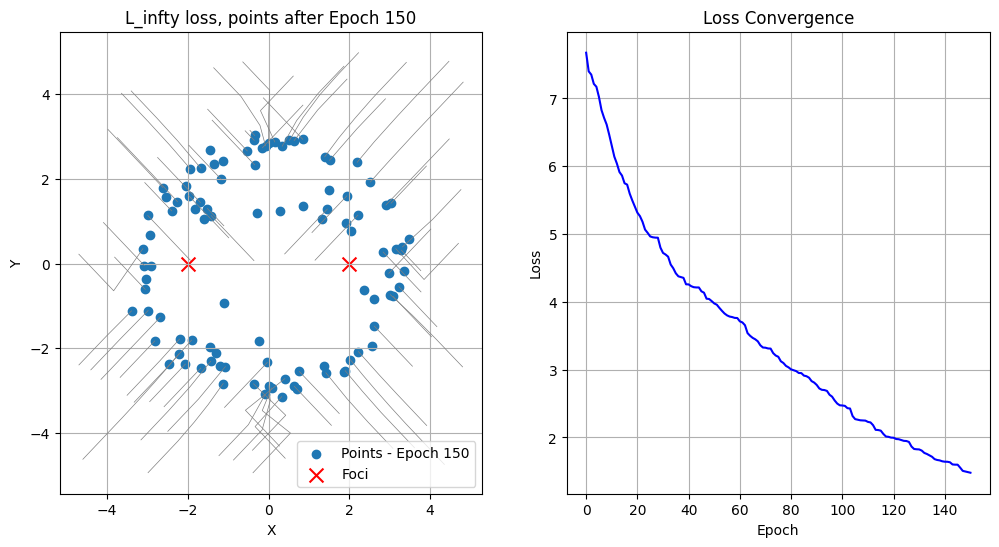

Epoch 150: Loss = 1.479451
[Epoch 151] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 152] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 153] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 154] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 155] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 156] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 157] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 158] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 159] Nie można policzyć gradientu: element 0 of tensors does n

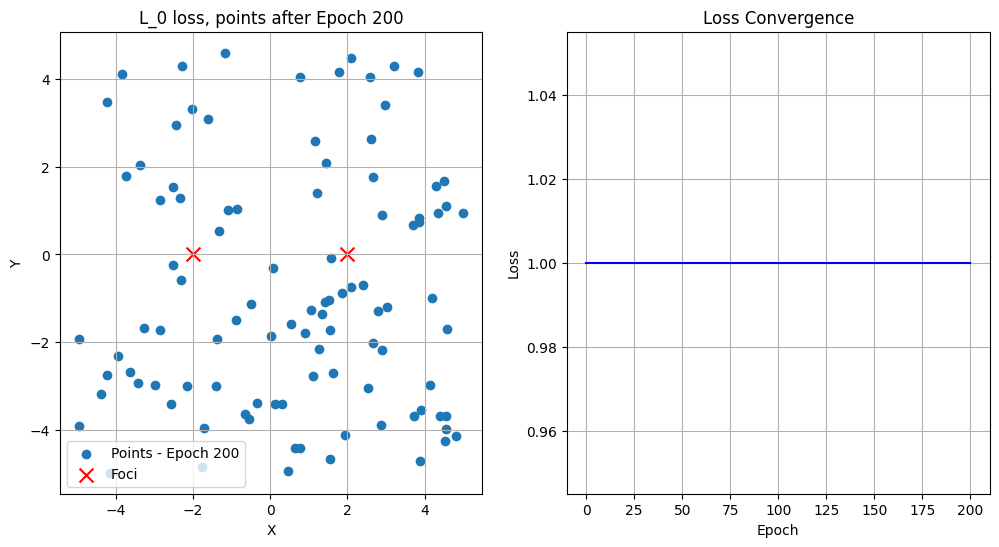

Epoch 200: Loss = 1.000000


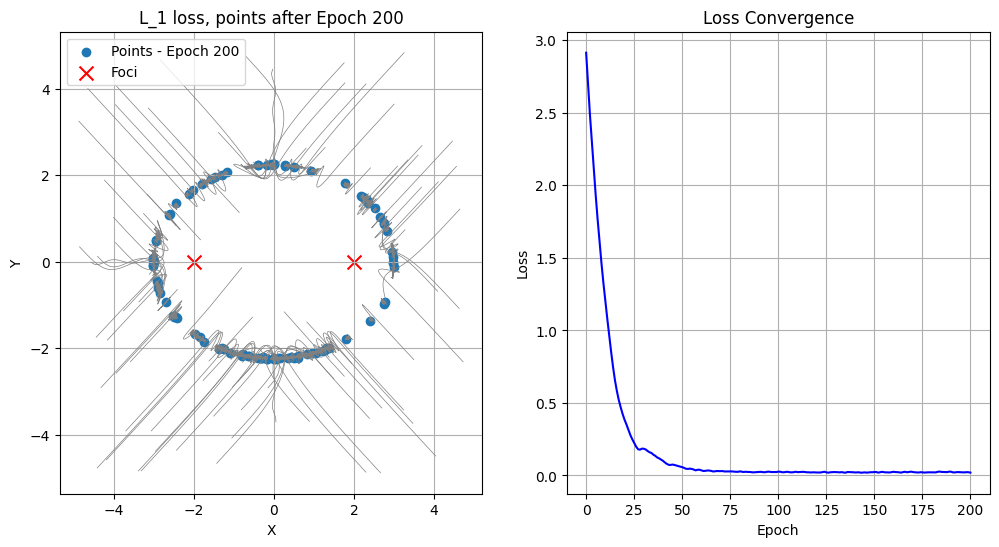

Epoch 200: Loss = 0.019360


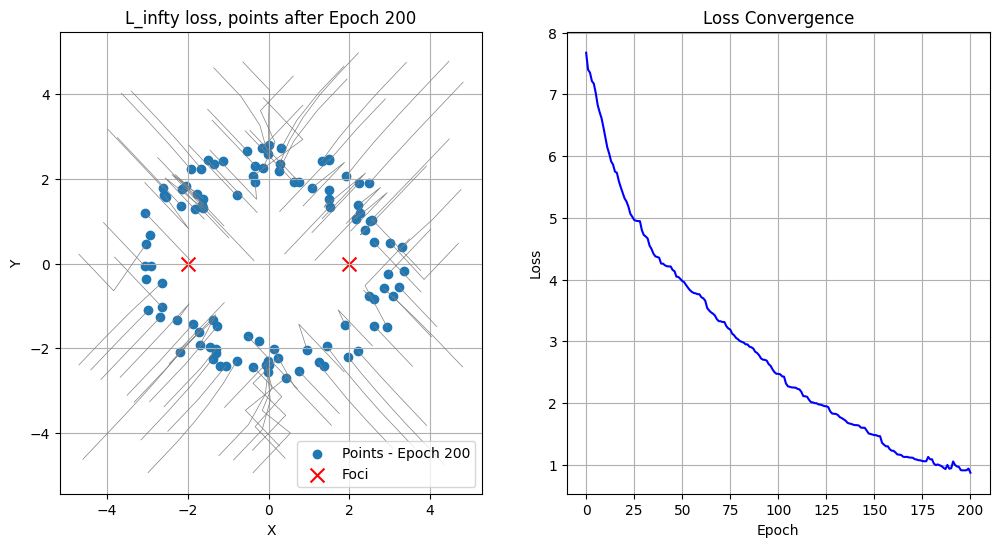

Epoch 200: Loss = 0.870482
[Epoch 201] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 202] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 203] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 204] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 205] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 206] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 207] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 208] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 209] Nie można policzyć gradientu: element 0 of tensors does n

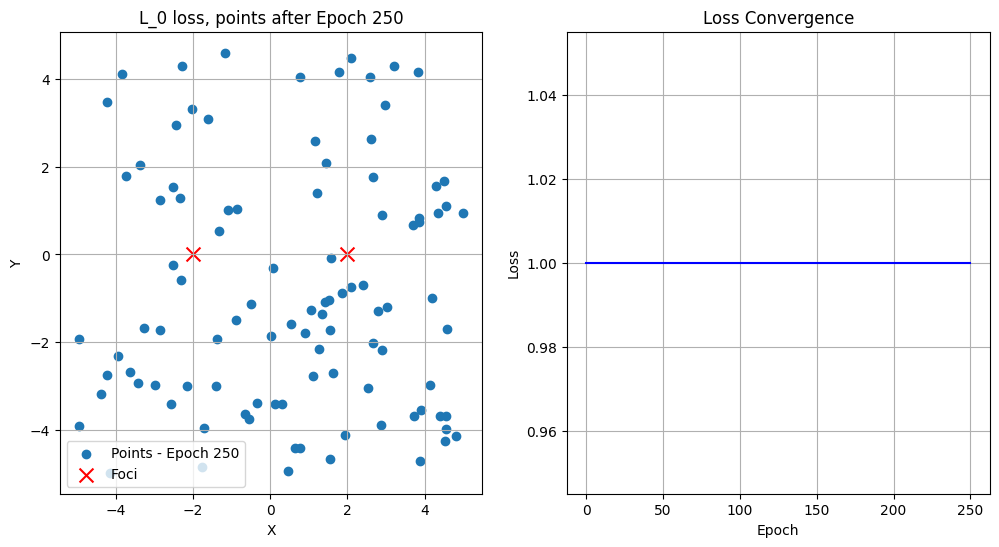

Epoch 250: Loss = 1.000000


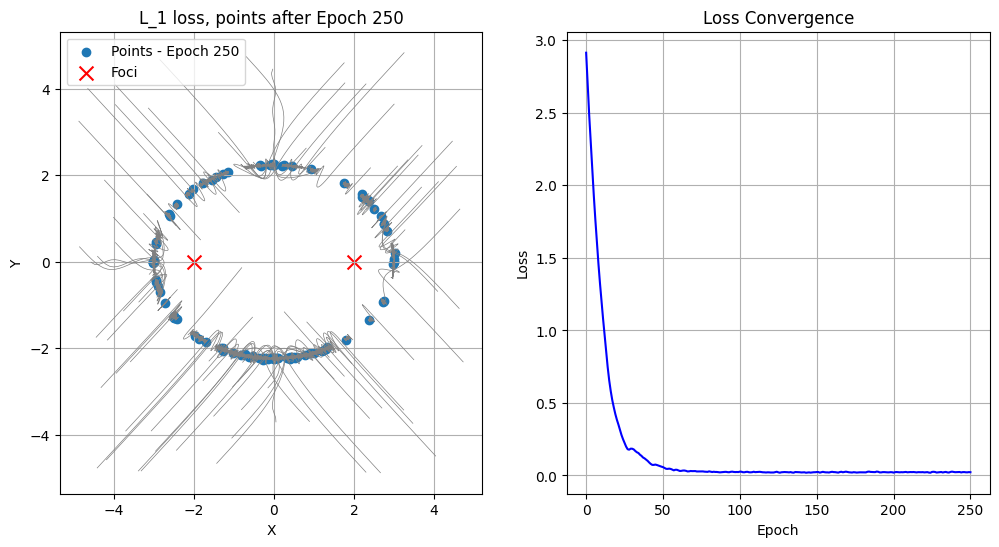

Epoch 250: Loss = 0.022152


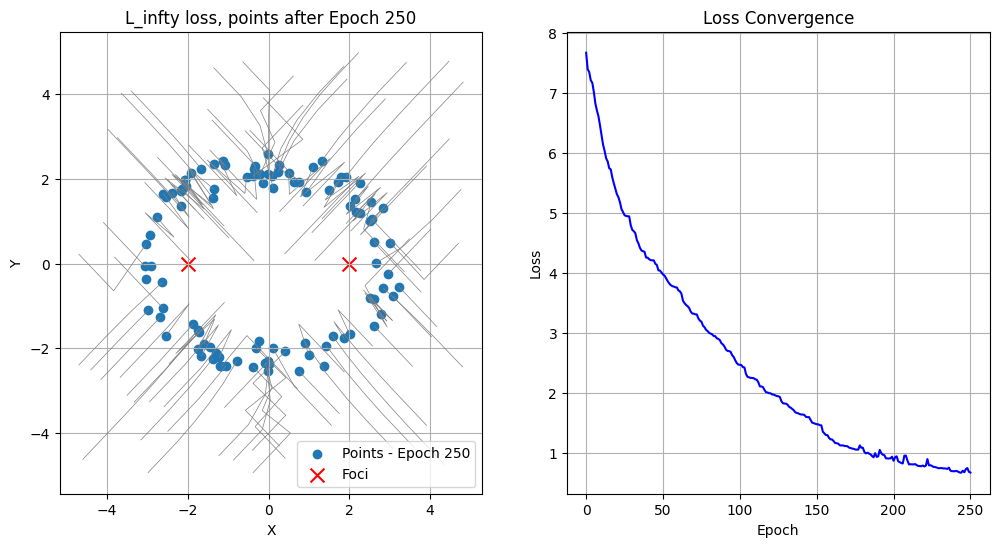

Epoch 250: Loss = 0.673743
[Epoch 251] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 252] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 253] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 254] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 255] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 256] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 257] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 258] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 259] Nie można policzyć gradientu: element 0 of tensors does n

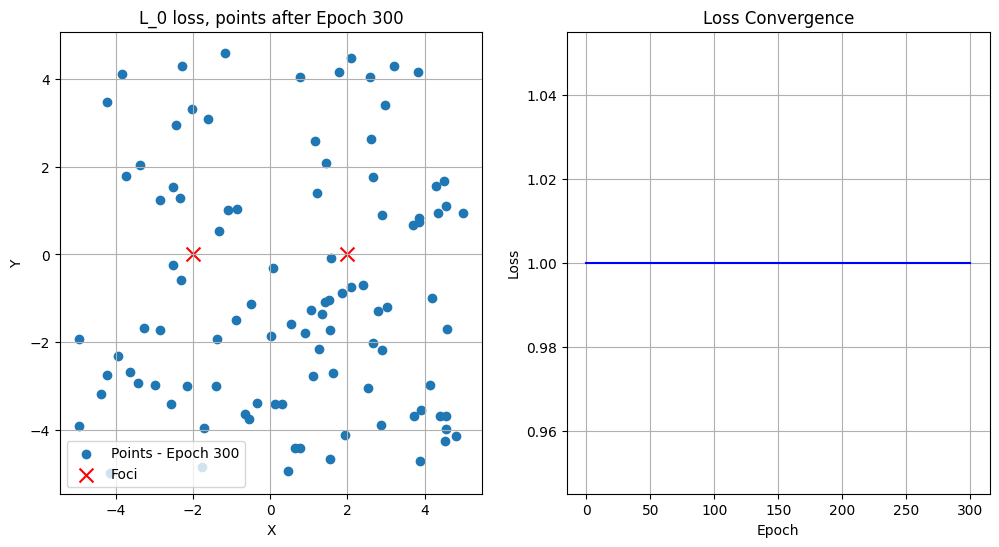

Epoch 300: Loss = 1.000000


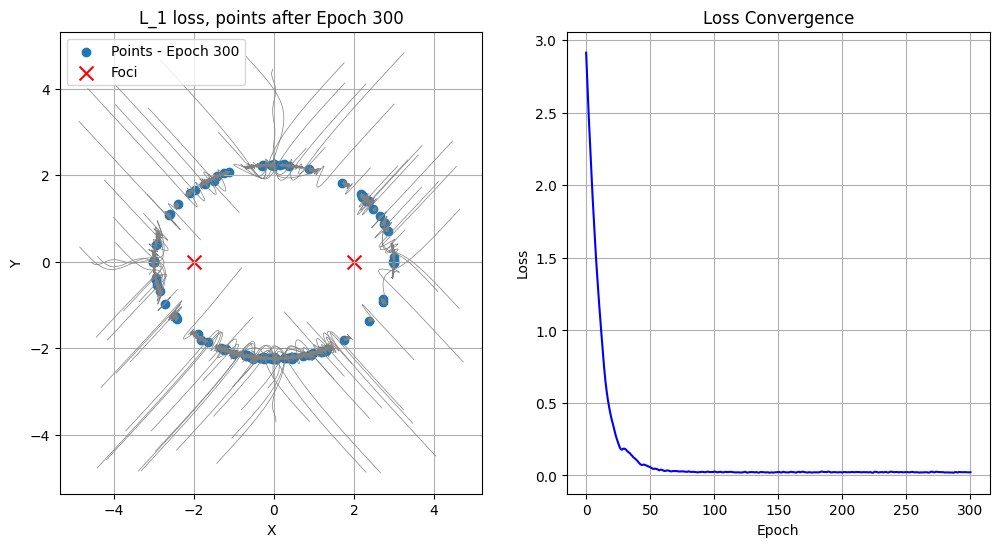

Epoch 300: Loss = 0.022251


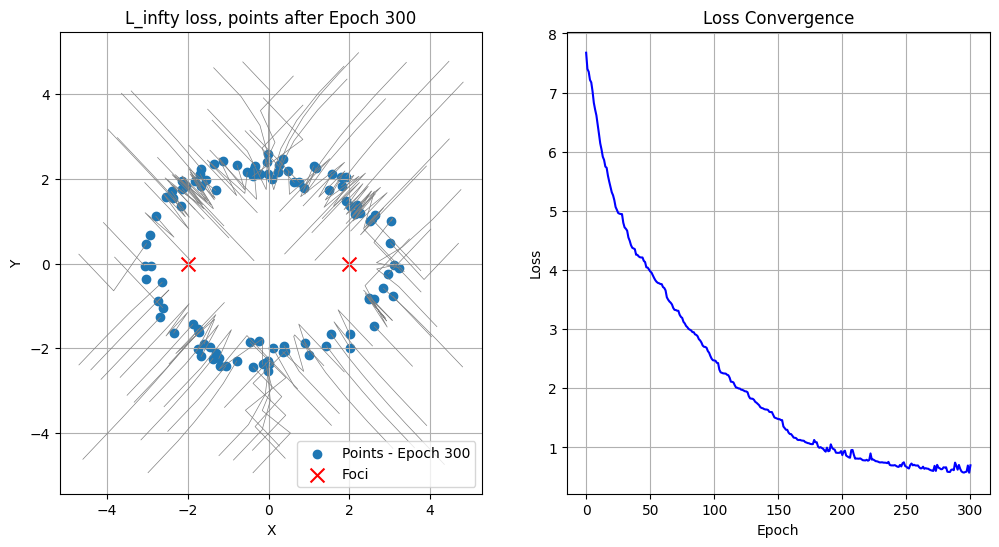

Epoch 300: Loss = 0.697989
[Epoch 301] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 302] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 303] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 304] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 305] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 306] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 307] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 308] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 309] Nie można policzyć gradientu: element 0 of tensors does n

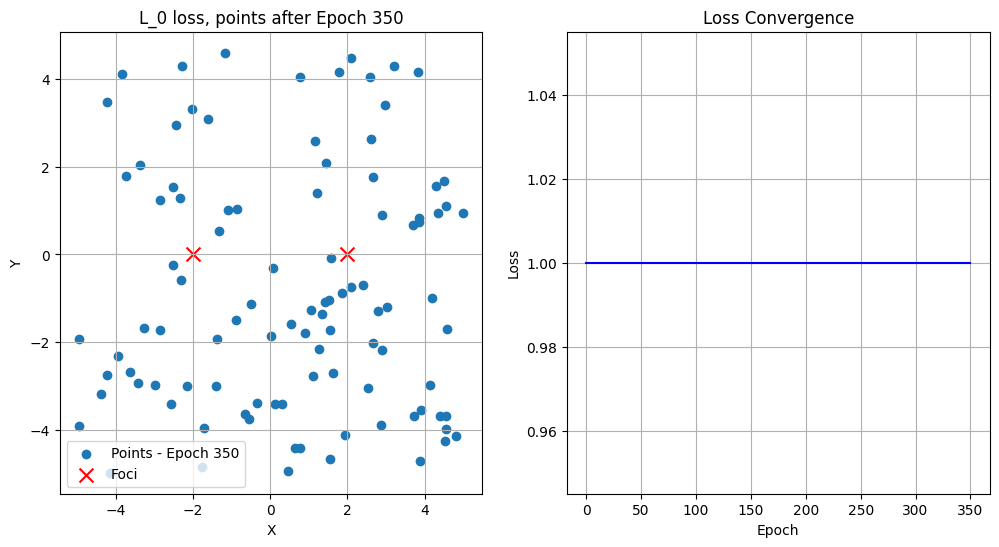

Epoch 350: Loss = 1.000000


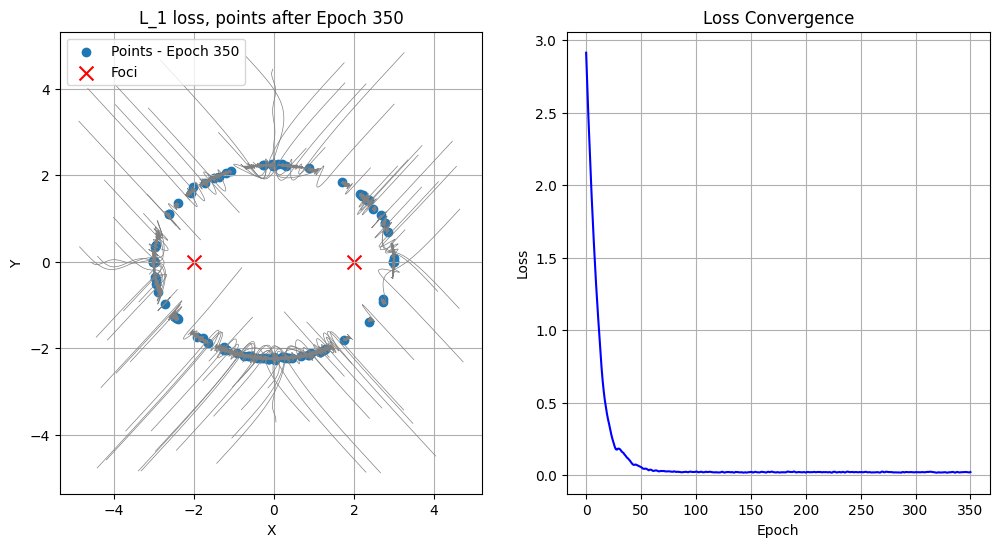

Epoch 350: Loss = 0.022836


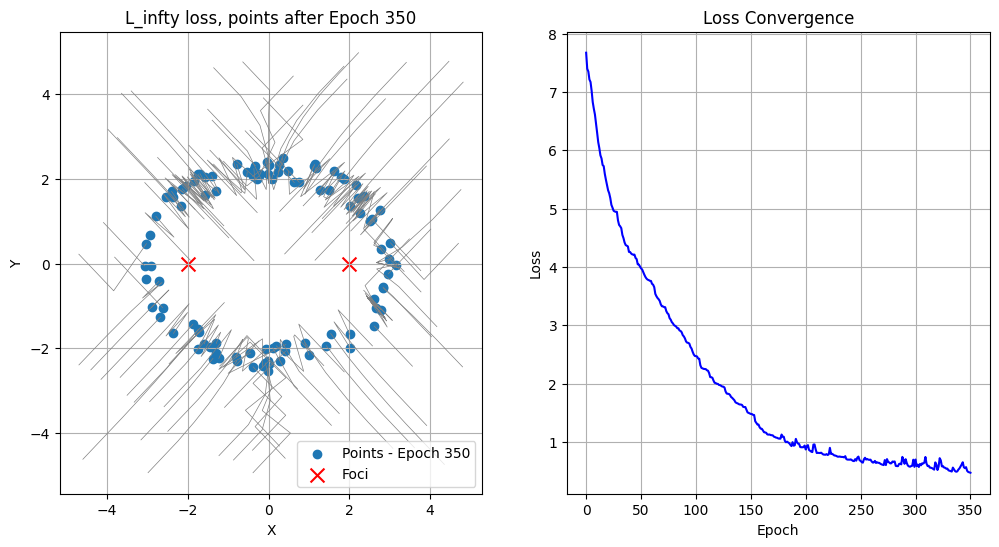

Epoch 350: Loss = 0.471957
[Epoch 351] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 352] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 353] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 354] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 355] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 356] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 357] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 358] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 359] Nie można policzyć gradientu: element 0 of tensors does n

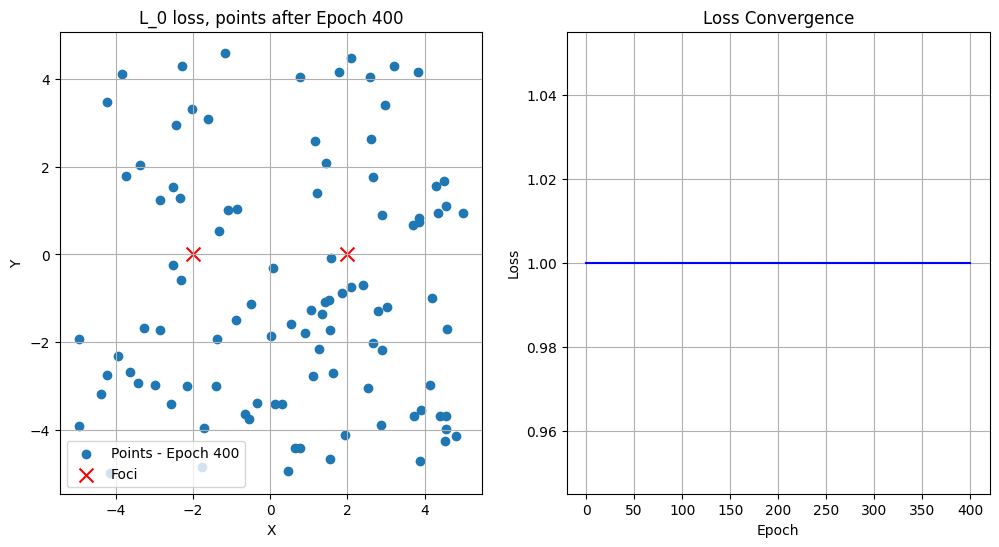

Epoch 400: Loss = 1.000000


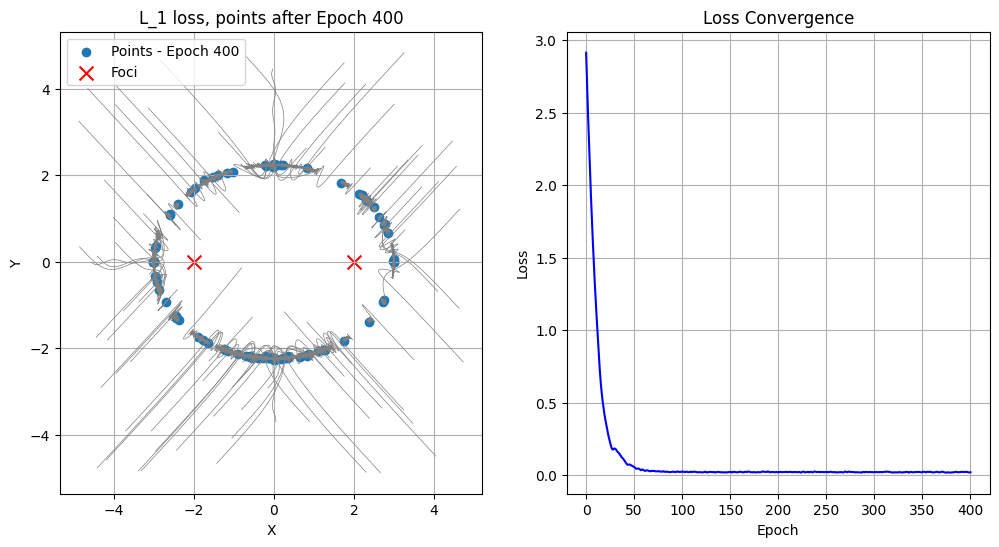

Epoch 400: Loss = 0.021247


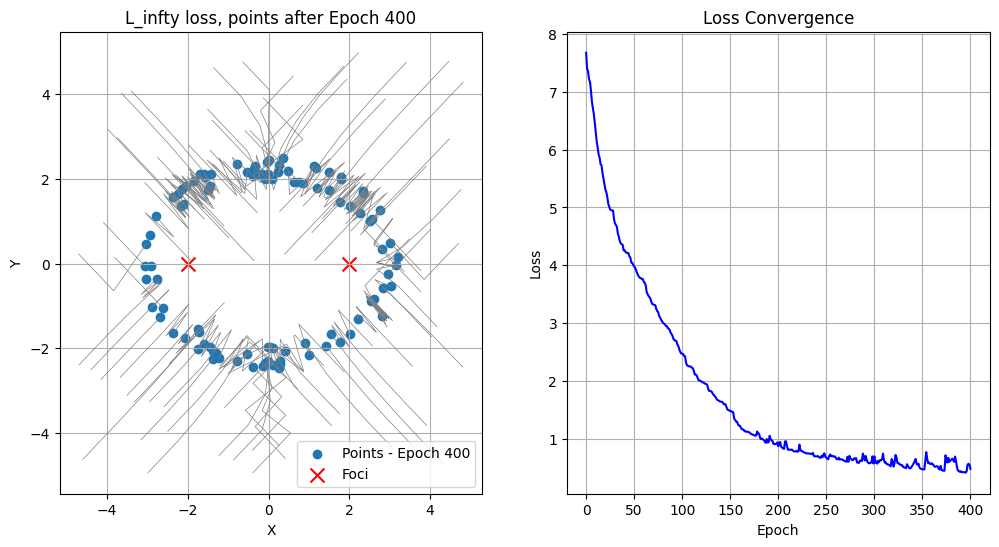

Epoch 400: Loss = 0.479144
[Epoch 401] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 402] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 403] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 404] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 405] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 406] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 407] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 408] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 409] Nie można policzyć gradientu: element 0 of tensors does n

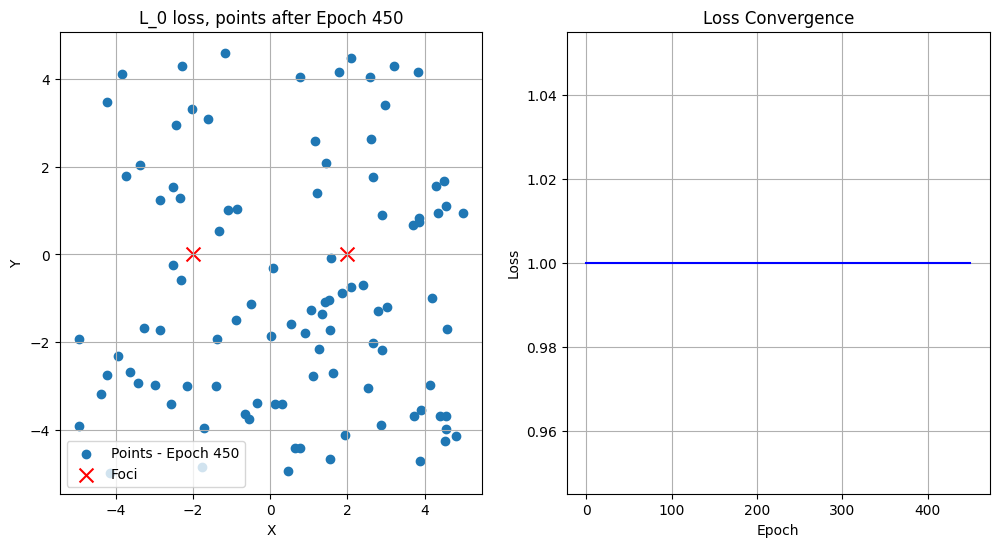

Epoch 450: Loss = 1.000000


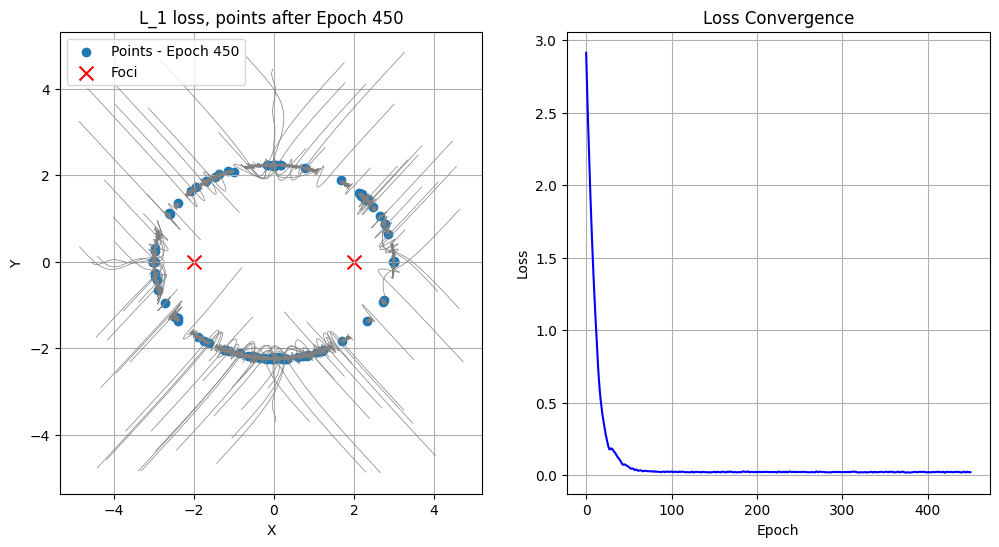

Epoch 450: Loss = 0.020394


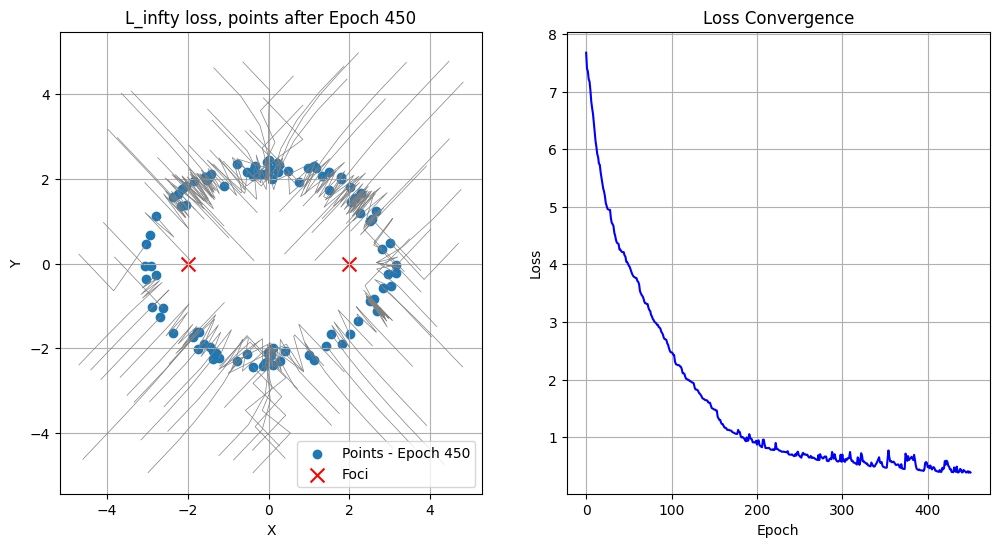

Epoch 450: Loss = 0.387406
[Epoch 451] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 452] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 453] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 454] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 455] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 456] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 457] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 458] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 459] Nie można policzyć gradientu: element 0 of tensors does n

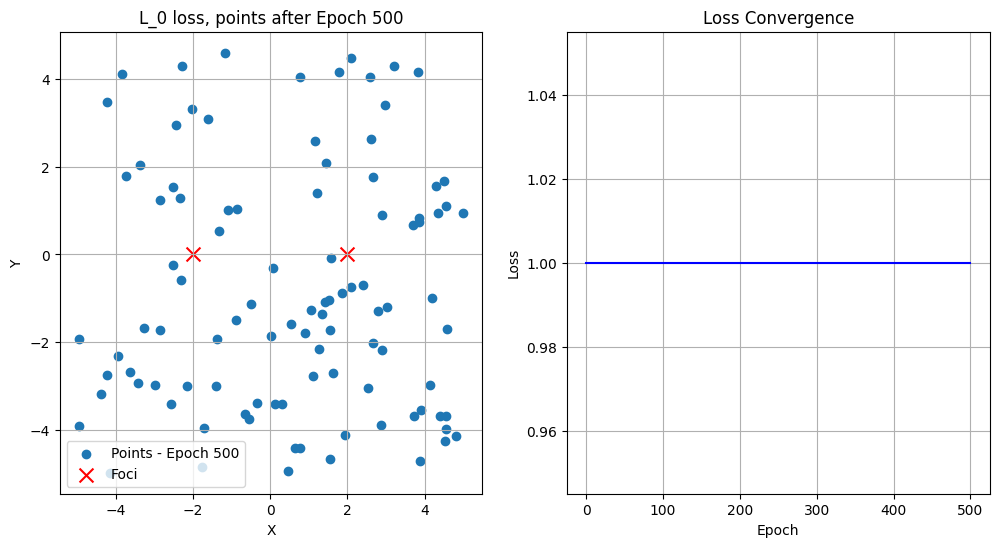

Epoch 500: Loss = 1.000000


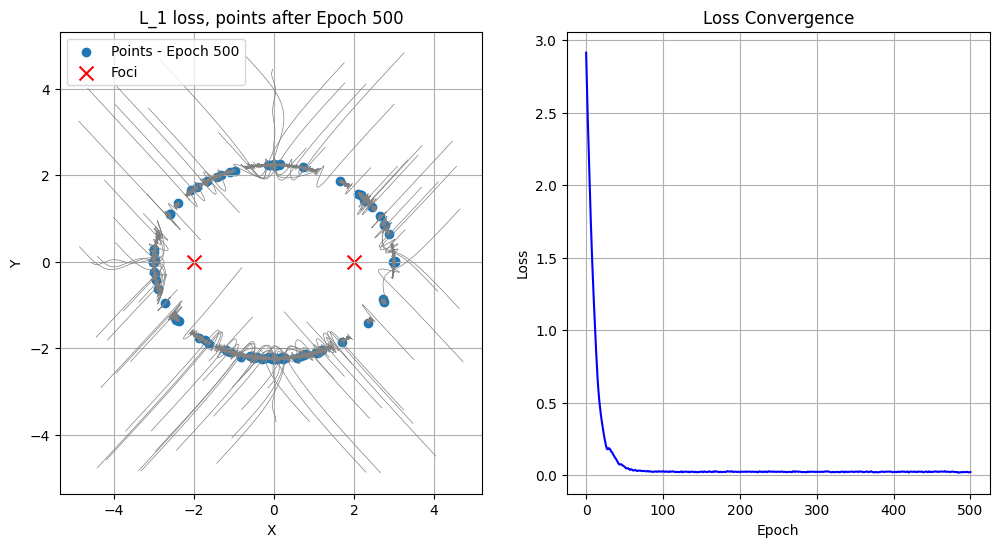

Epoch 500: Loss = 0.020481


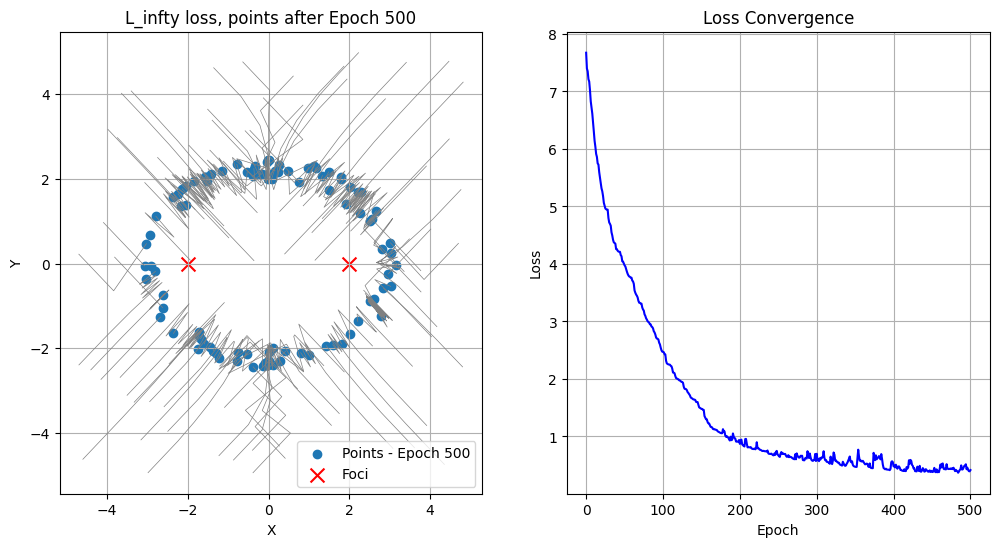

Epoch 500: Loss = 0.415124
[Epoch 501] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 502] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 503] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 504] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 505] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 506] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 507] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 508] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 509] Nie można policzyć gradientu: element 0 of tensors does n

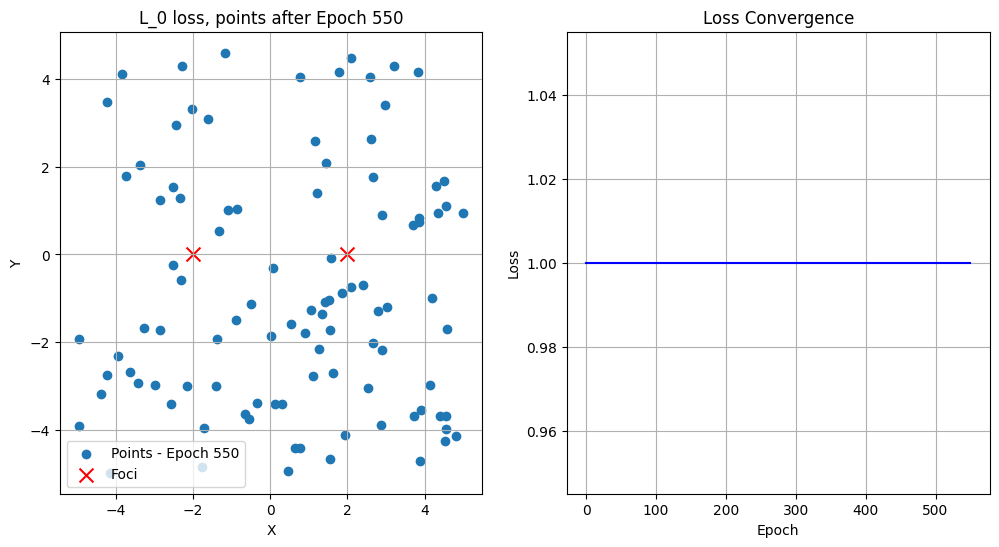

Epoch 550: Loss = 1.000000


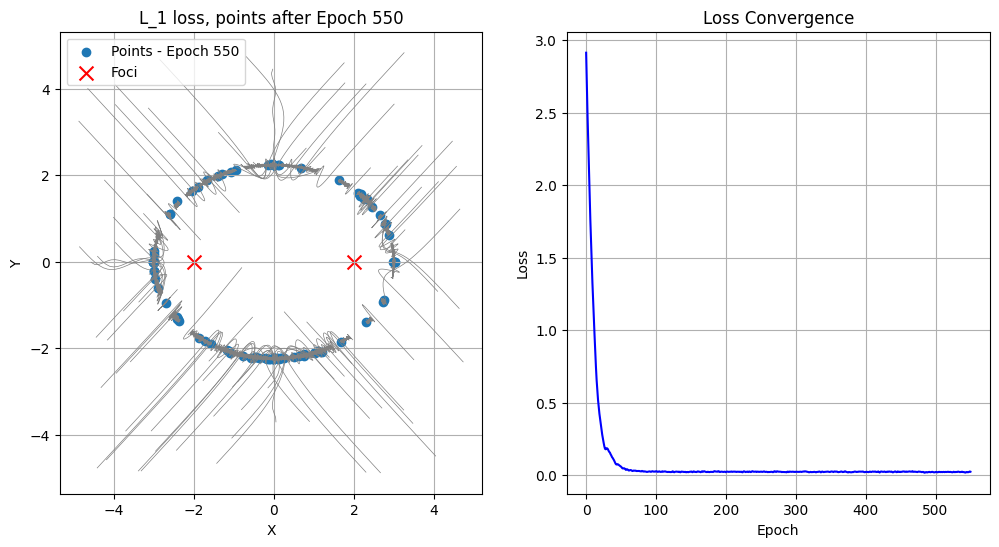

Epoch 550: Loss = 0.022595


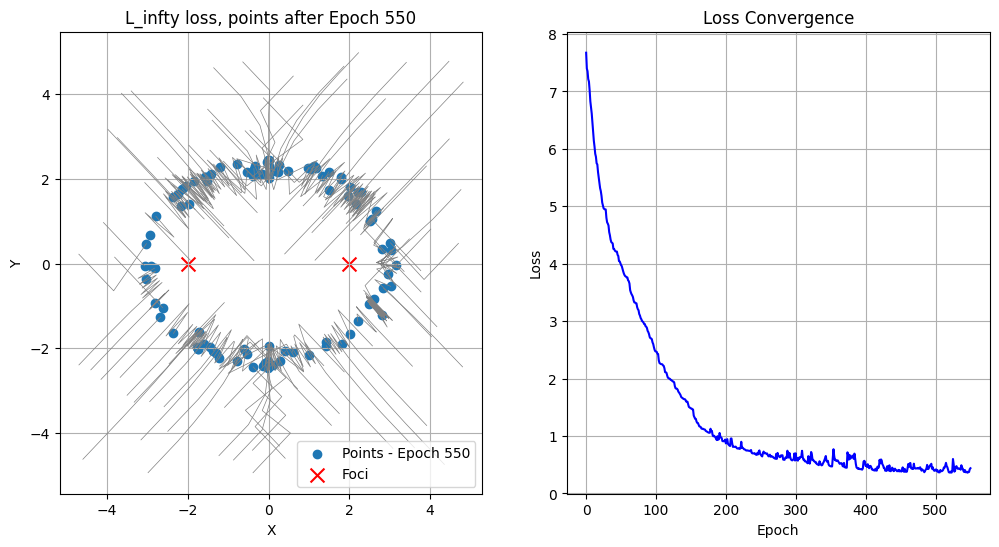

Epoch 550: Loss = 0.438224
[Epoch 551] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 552] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 553] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 554] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 555] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 556] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 557] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 558] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 559] Nie można policzyć gradientu: element 0 of tensors does n

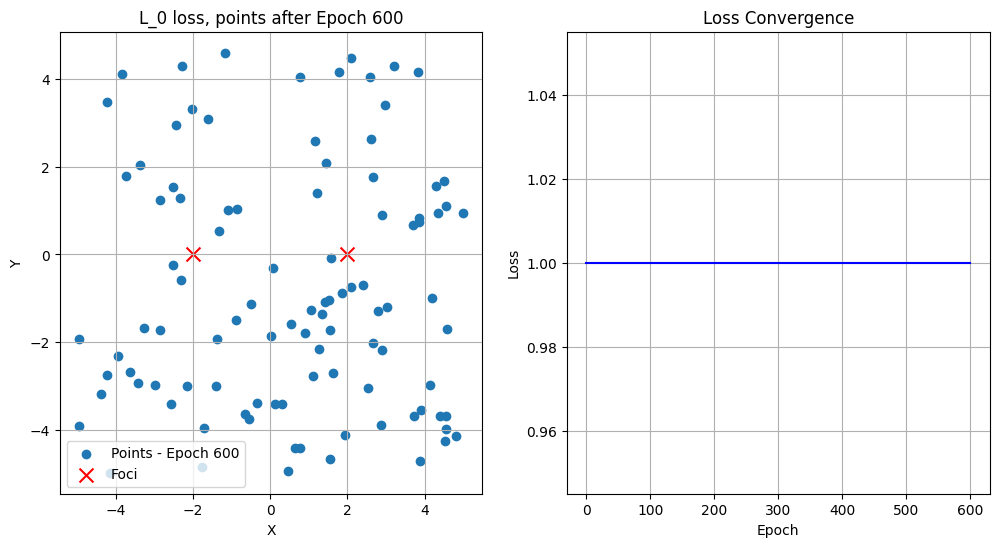

Epoch 600: Loss = 1.000000


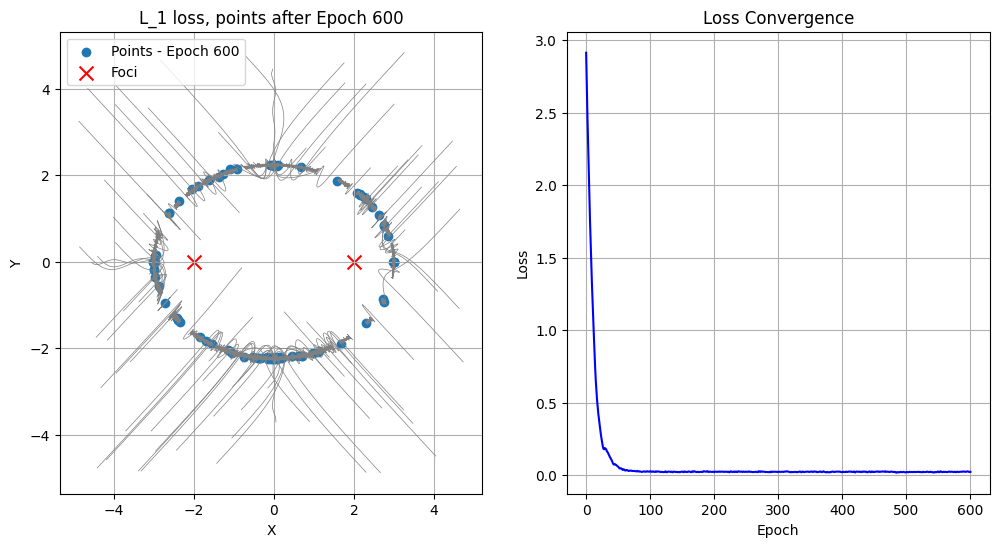

Epoch 600: Loss = 0.021953


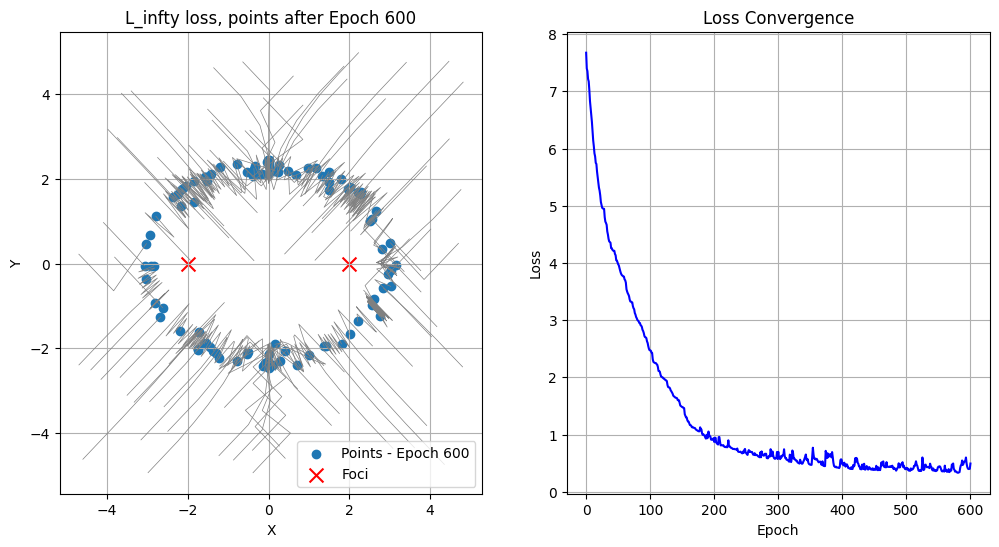

Epoch 600: Loss = 0.493014
[Epoch 601] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 602] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 603] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 604] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 605] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 606] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 607] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 608] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 609] Nie można policzyć gradientu: element 0 of tensors does n

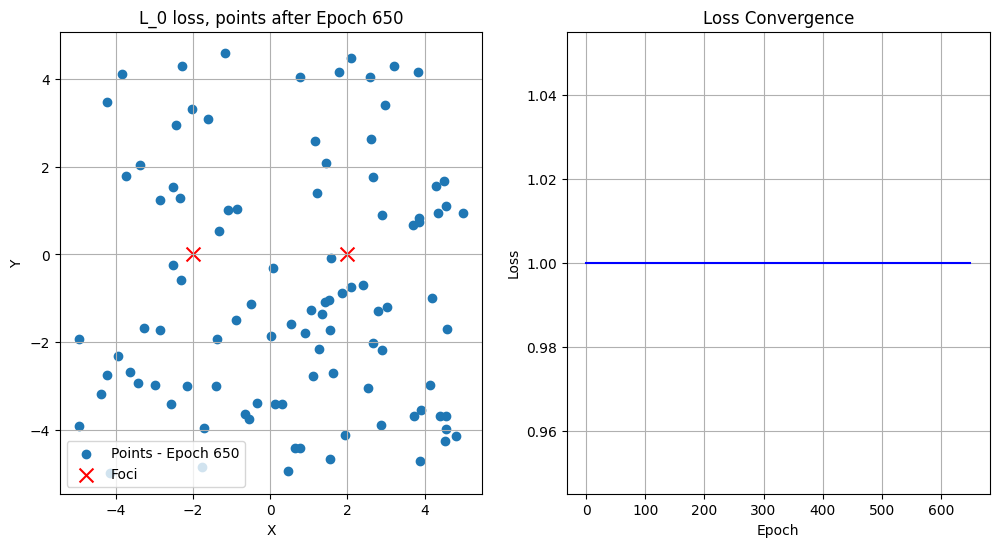

Epoch 650: Loss = 1.000000


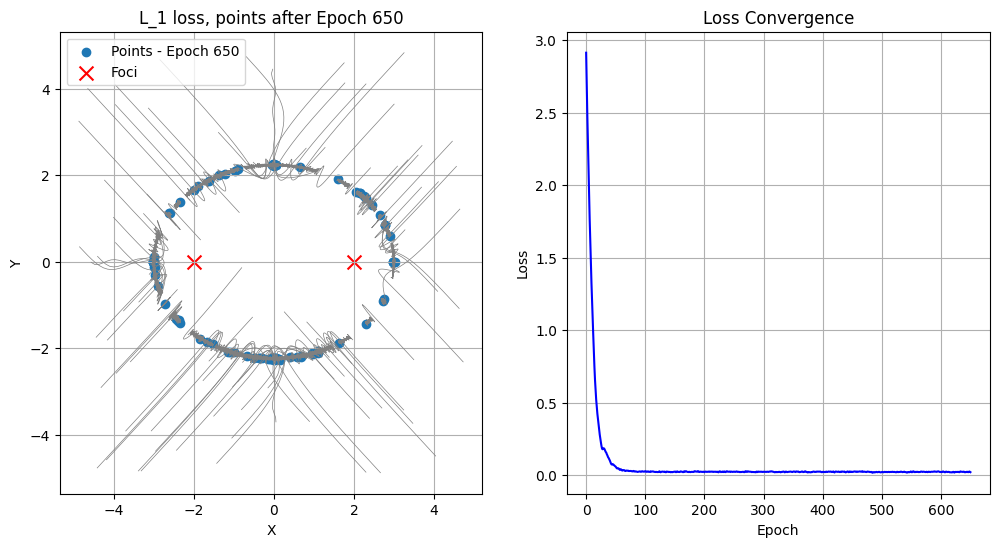

Epoch 650: Loss = 0.019458


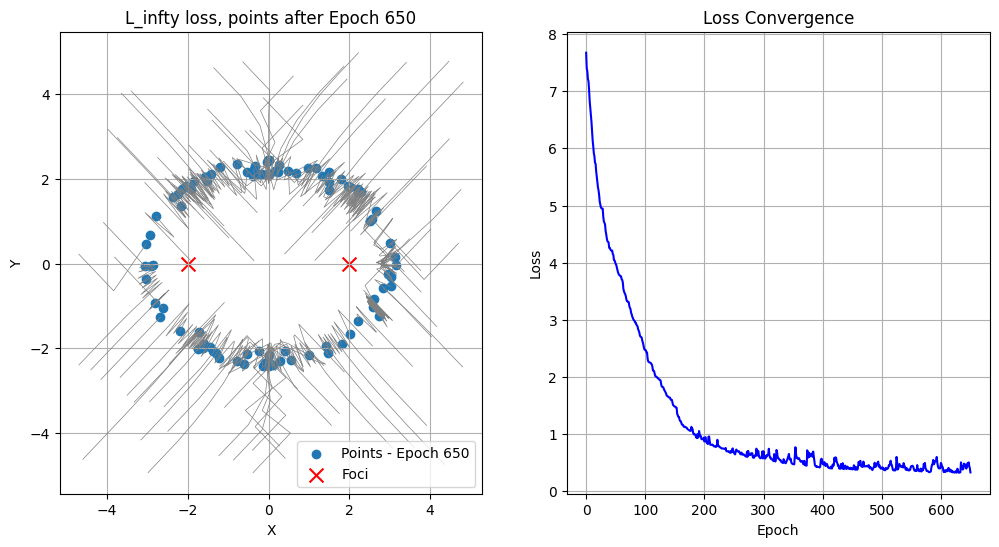

Epoch 650: Loss = 0.327924
[Epoch 651] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 652] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 653] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 654] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 655] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 656] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 657] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 658] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 659] Nie można policzyć gradientu: element 0 of tensors does n

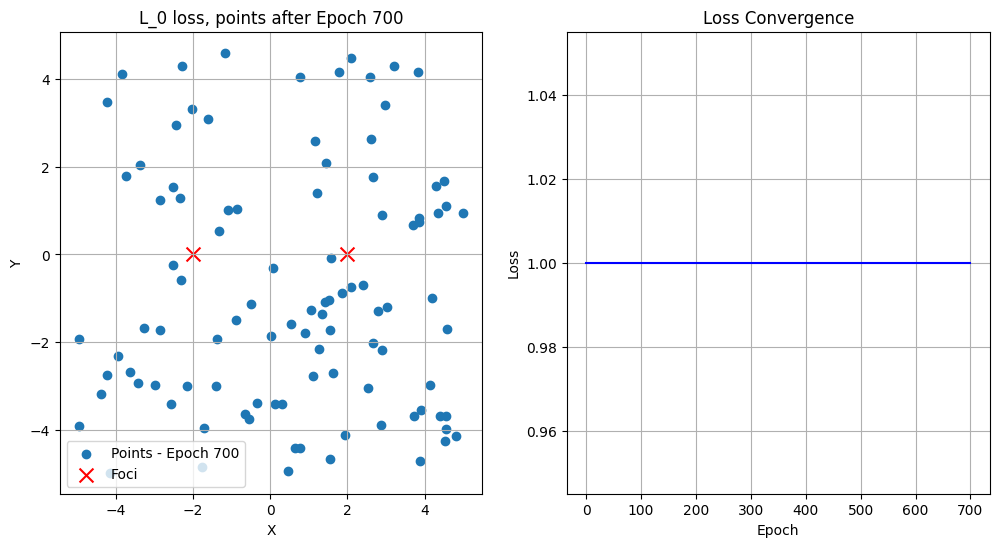

Epoch 700: Loss = 1.000000


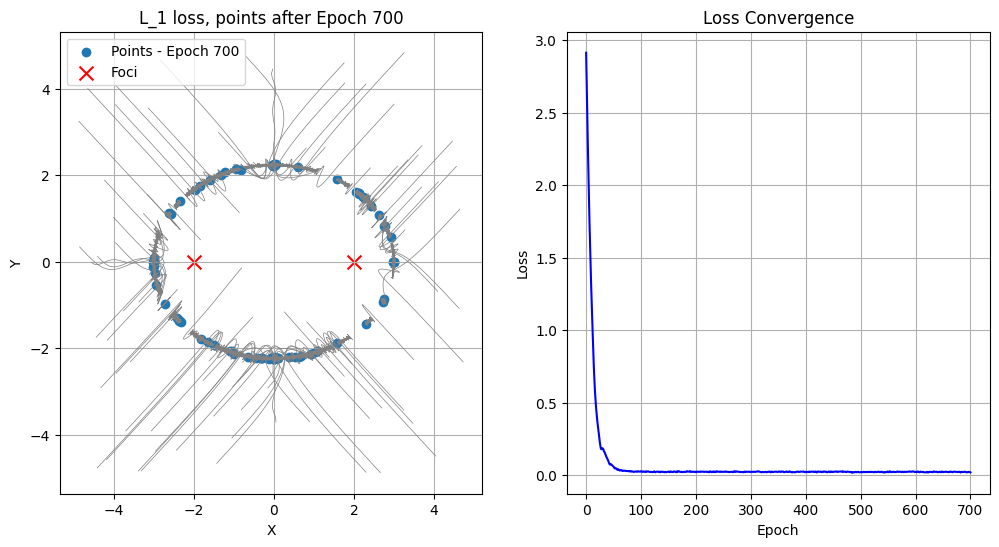

Epoch 700: Loss = 0.017712


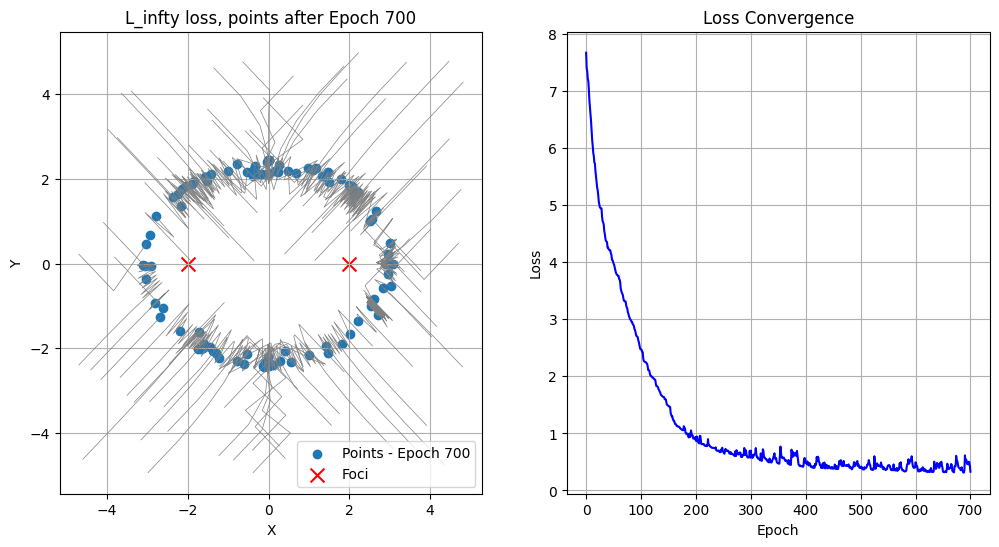

Epoch 700: Loss = 0.328804
[Epoch 701] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 702] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 703] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 704] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 705] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 706] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 707] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 708] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 709] Nie można policzyć gradientu: element 0 of tensors does n

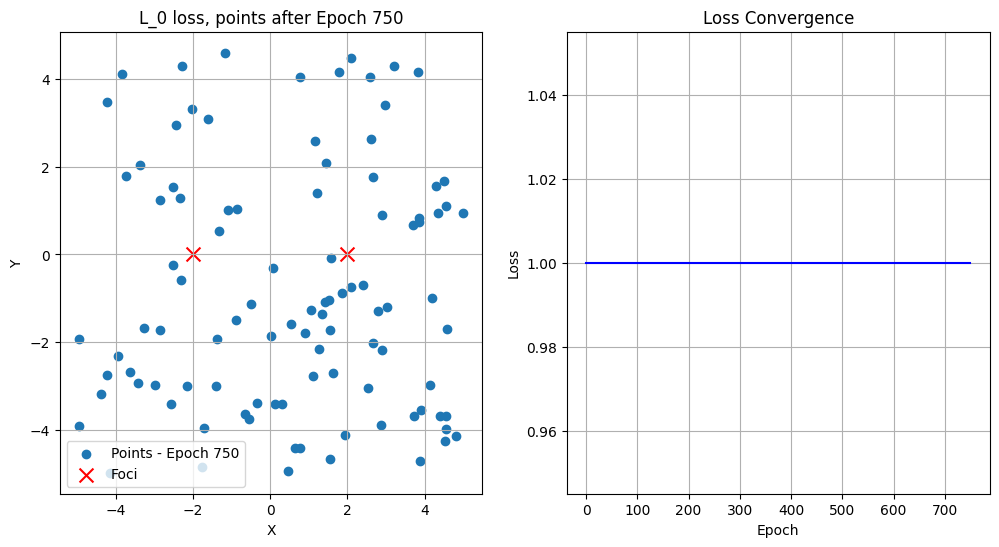

Epoch 750: Loss = 1.000000


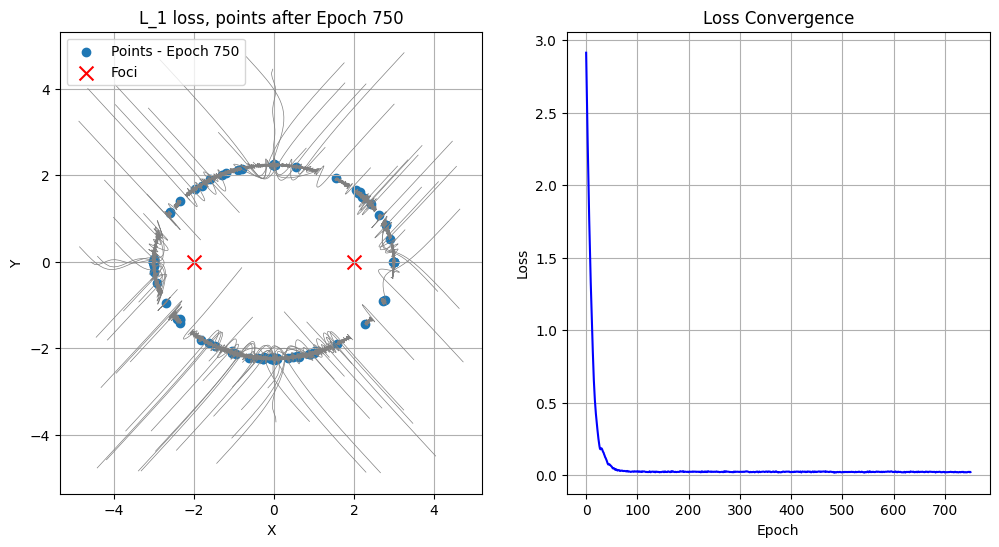

Epoch 750: Loss = 0.019975


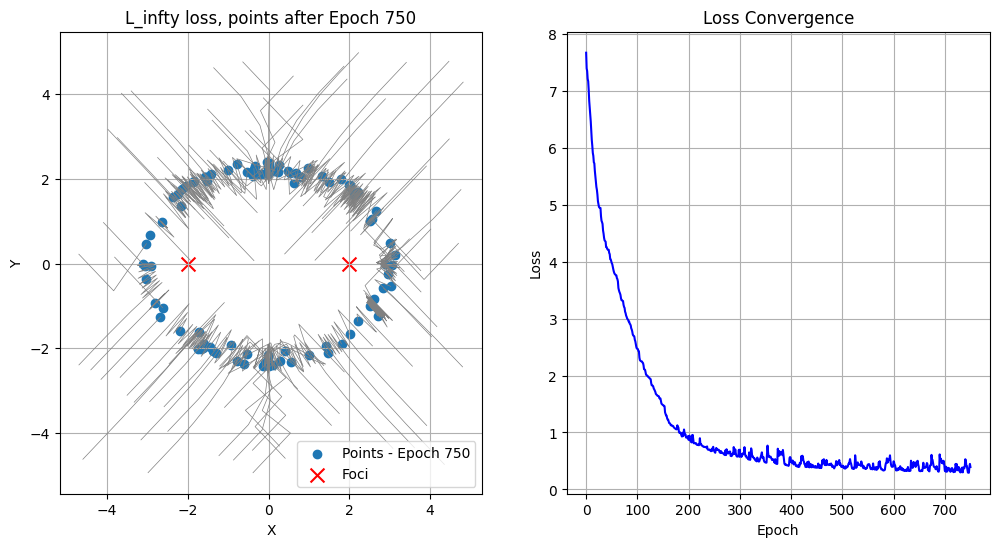

Epoch 750: Loss = 0.393493
[Epoch 751] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 752] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 753] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 754] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 755] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 756] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 757] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 758] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 759] Nie można policzyć gradientu: element 0 of tensors does n

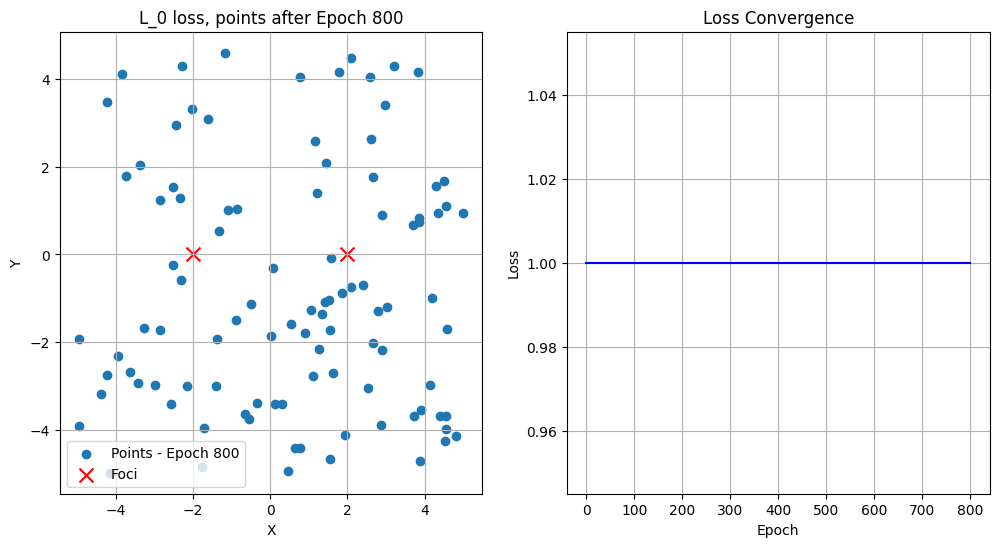

Epoch 800: Loss = 1.000000


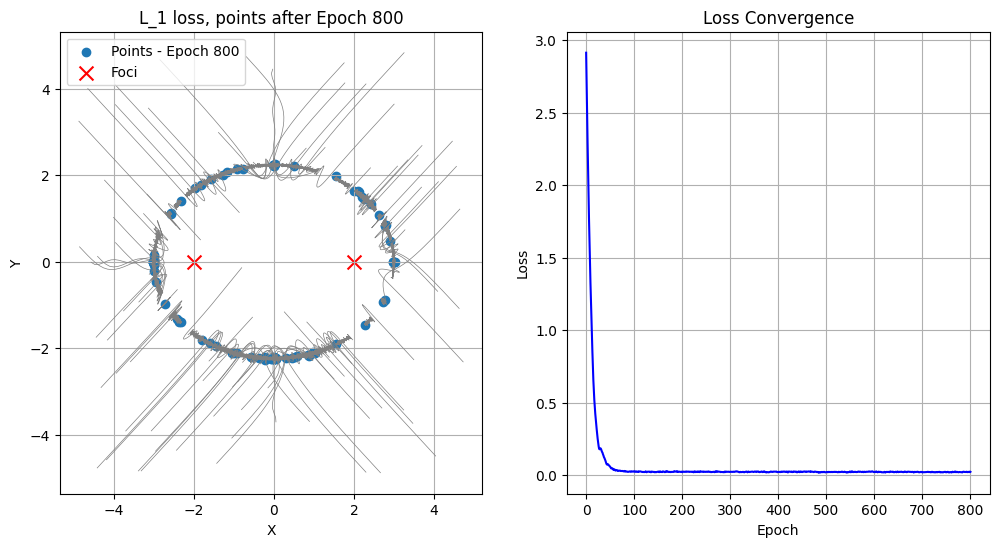

Epoch 800: Loss = 0.021571


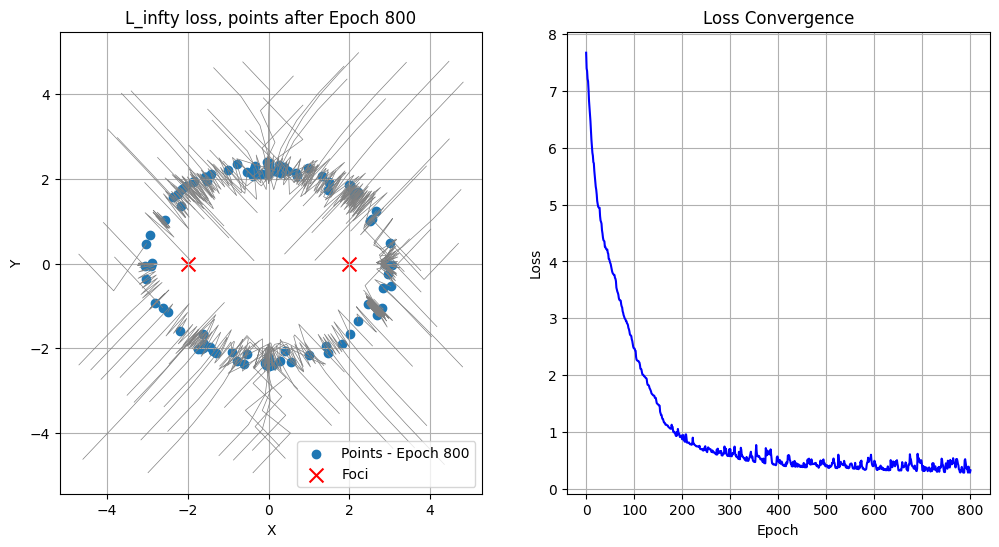

Epoch 800: Loss = 0.323367
[Epoch 801] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 802] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 803] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 804] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 805] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 806] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 807] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 808] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 809] Nie można policzyć gradientu: element 0 of tensors does n

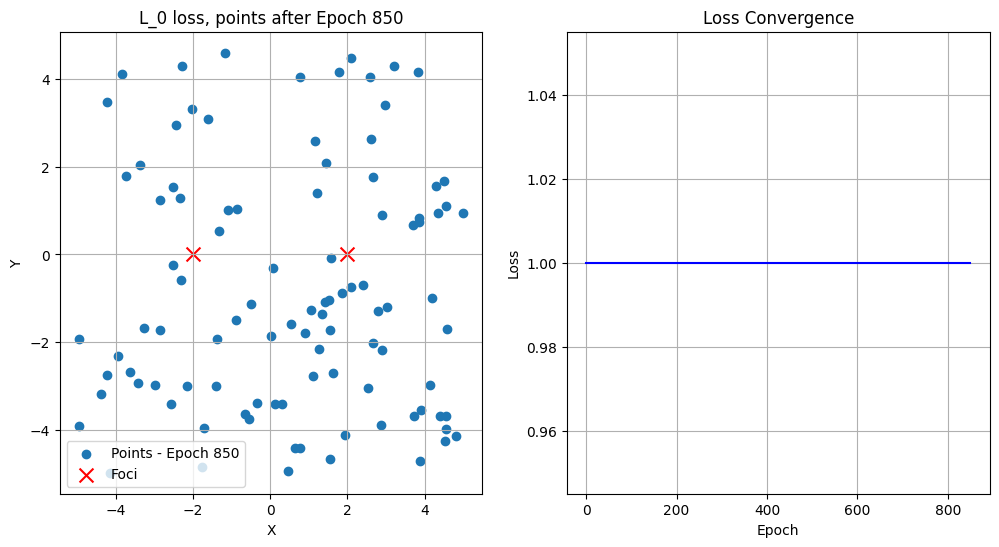

Epoch 850: Loss = 1.000000


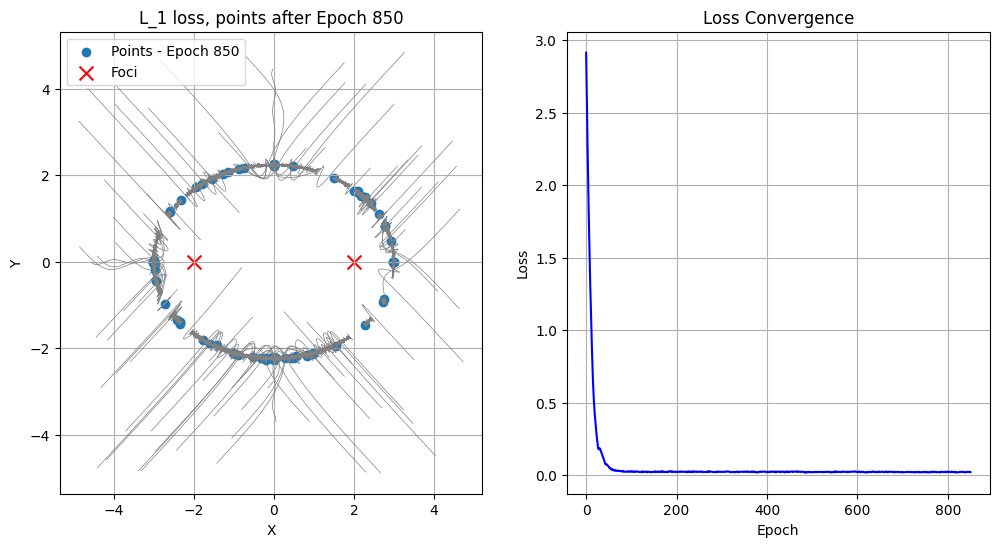

Epoch 850: Loss = 0.019679


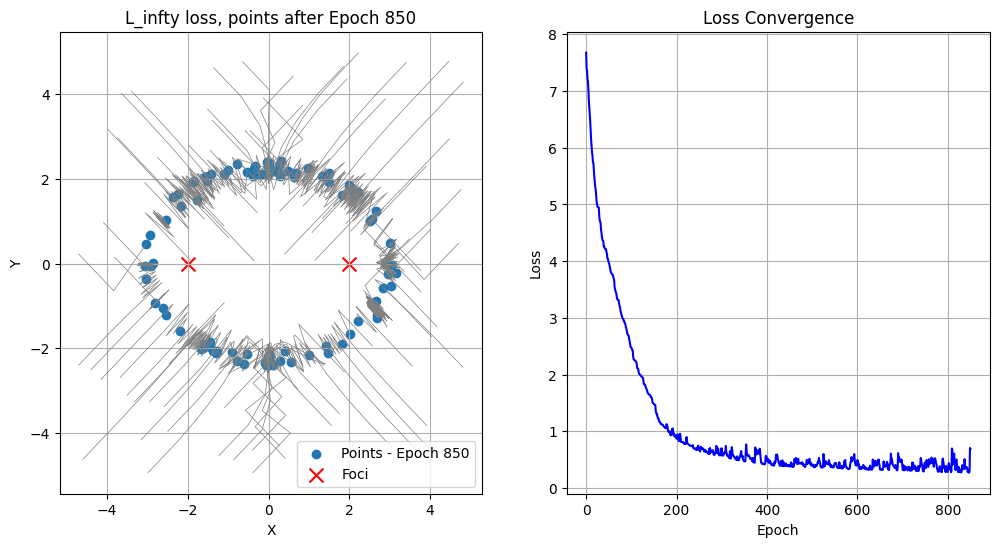

Epoch 850: Loss = 0.689420
[Epoch 851] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 852] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 853] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 854] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 855] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 856] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 857] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 858] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 859] Nie można policzyć gradientu: element 0 of tensors does n

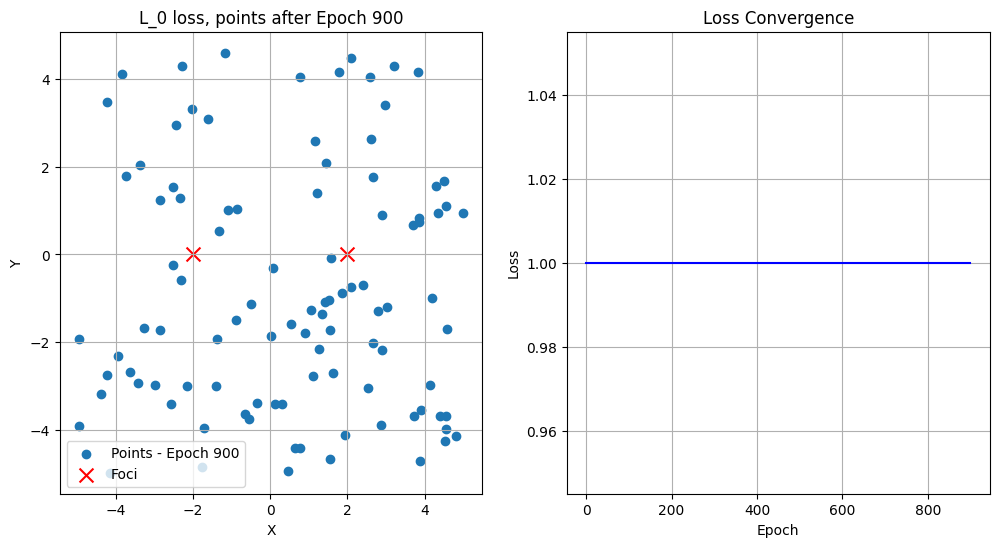

Epoch 900: Loss = 1.000000


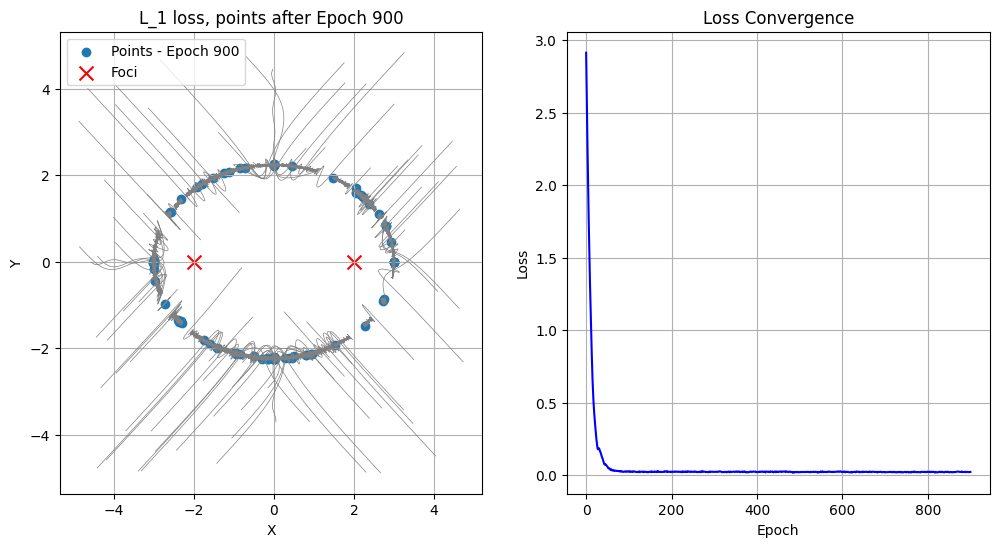

Epoch 900: Loss = 0.021168


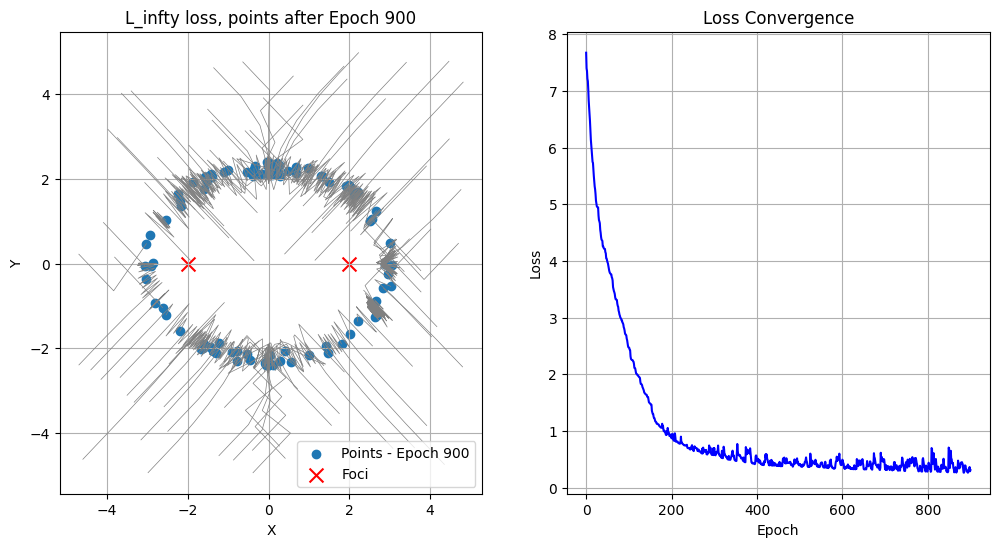

Epoch 900: Loss = 0.308893
[Epoch 901] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 902] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 903] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 904] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 905] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 906] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 907] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 908] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 909] Nie można policzyć gradientu: element 0 of tensors does n

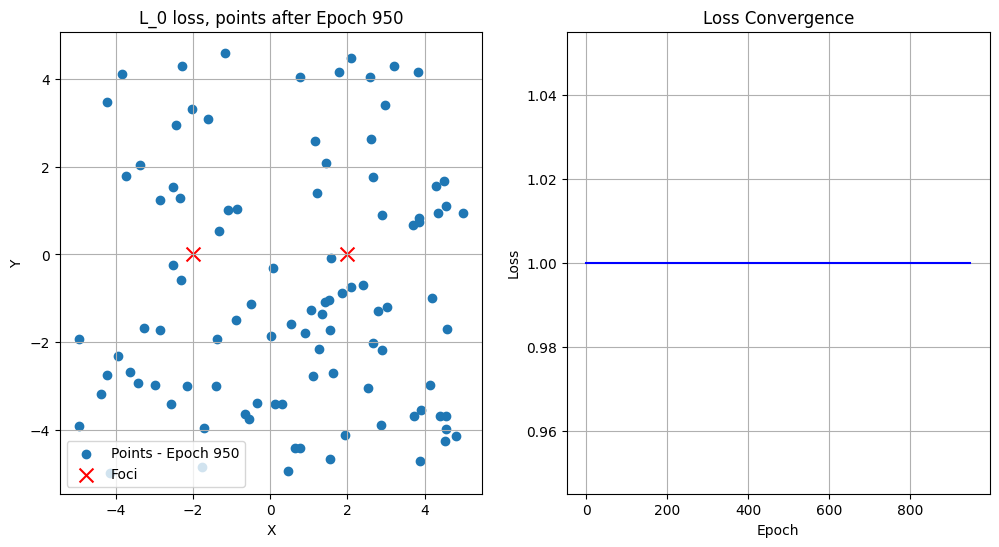

Epoch 950: Loss = 1.000000


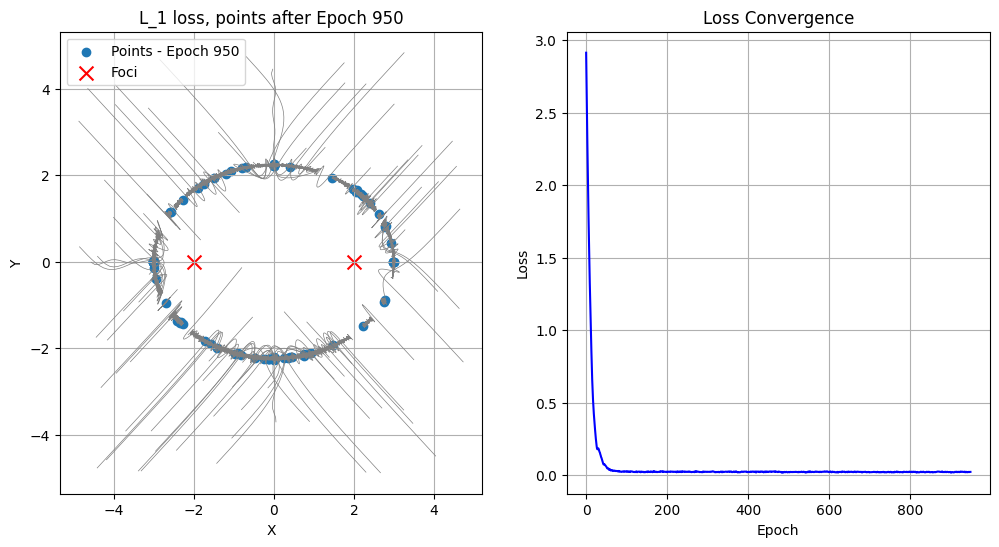

Epoch 950: Loss = 0.021401


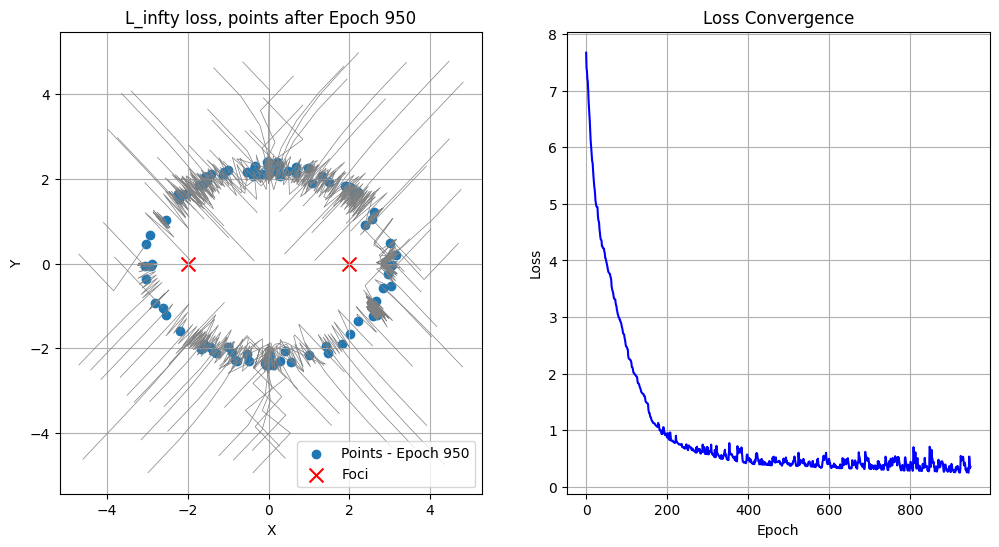

Epoch 950: Loss = 0.348384
[Epoch 951] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 952] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 953] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 954] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 955] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 956] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 957] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 958] Nie można policzyć gradientu: element 0 of tensors does not require grad and does not have a grad_fn
[Epoch 959] Nie można policzyć gradientu: element 0 of tensors does n

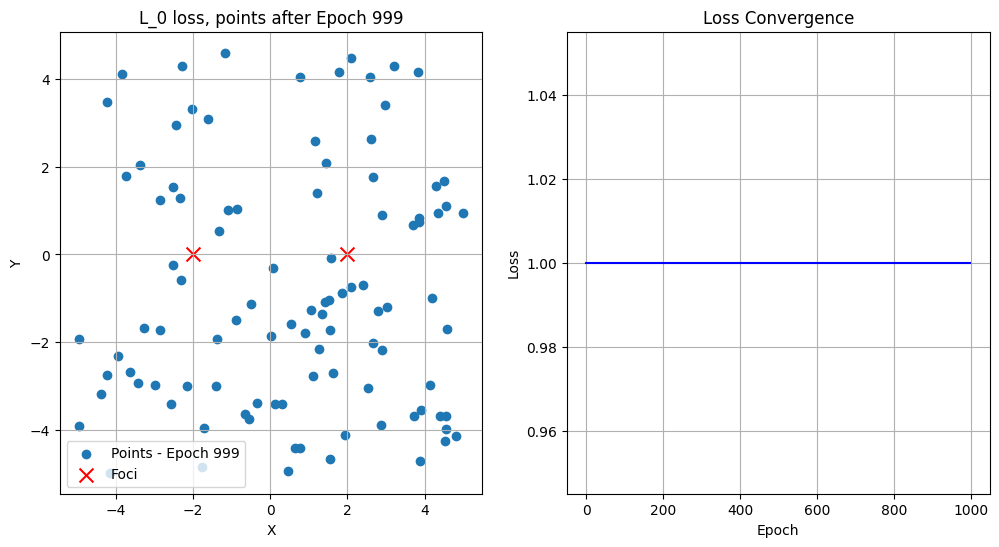

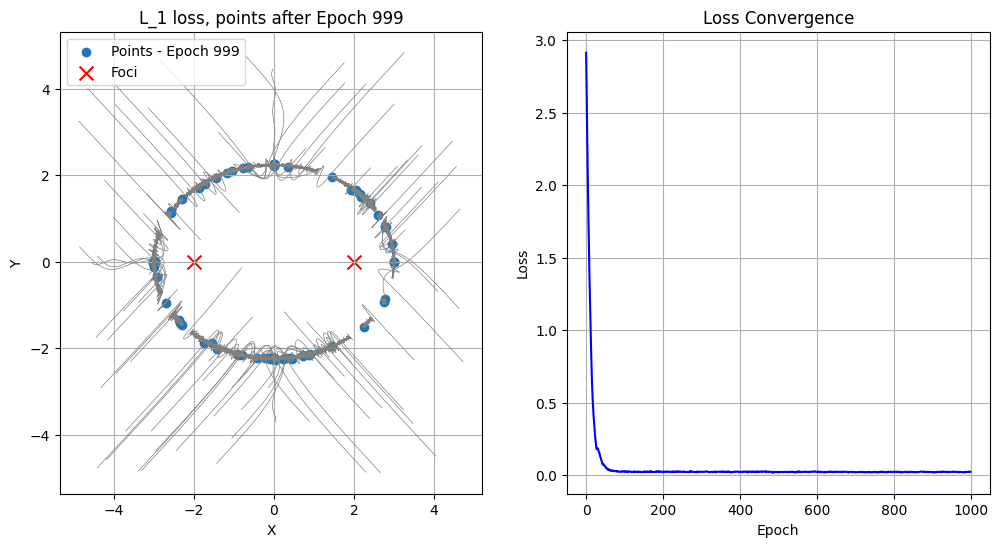

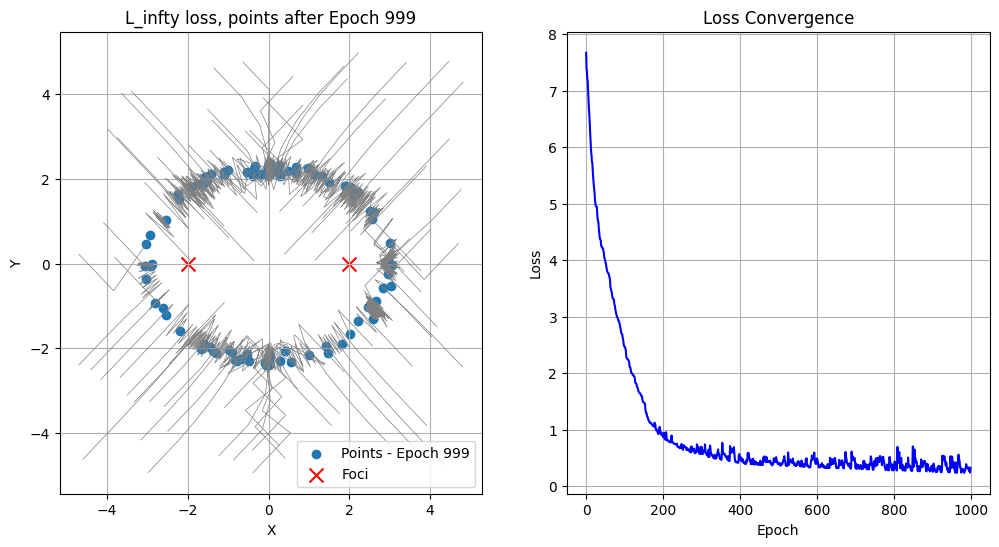

Elapsed time: 53.05790662765503 seconds


In [12]:
# Fix the random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define ellipse parameters
focus1 = torch.tensor([-2.0, 0.0])  # First focus
focus2 = torch.tensor([2.0, 0.0])   # Second focus
constant_sum = 6.0  # The sum of distances to the two foci

# Initialize random 2D points from uniform distribution
num_points = 100

points1 = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points1.requires_grad = True

points2 = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points2.requires_grad = True

points3 = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points3.requires_grad = True

# Reset trajectories
trajectories1 = [[] for _ in range(num_points)]
loss_history1 = []

trajectories2 = [[] for _ in range(num_points)]
loss_history2 = []

trajectories3 = [[] for _ in range(num_points)]
loss_history3 = []


import time
# Start timing
start_time = time.time()


# Define optimizer
optimizer1 = torch.optim.Adam([points1], lr=0.1)
optimizer2 = torch.optim.Adam([points2], lr=0.1)
optimizer3 = torch.optim.Adam([points3], lr=0.1)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer1.zero_grad()
    optimizer2.zero_grad()
    optimizer3.zero_grad()

    # Compute distances to both foci
    dist11 = torch.norm(points1 - focus1, dim=1)
    dist21 = torch.norm(points1 - focus2, dim=1)
    error1 = dist11+dist21-constant_sum

    dist12 = torch.norm(points2 - focus1, dim=1)
    dist22 = torch.norm(points2 - focus2, dim=1)
    error2 = dist12+dist22-constant_sum

    dist13 = torch.norm(points3 - focus1, dim=1)
    dist23 = torch.norm(points3 - focus2, dim=1)
    error3 = dist13+dist23-constant_sum

    # Compute loss - it is implemented as MSE loss related to l_2 norm
    # TODO: your job is to replace the line below
    # with l_0, l_1 and l_infty - related loss
    loss1 = (error1!=0).float().mean()
    loss2 = error2.abs().mean()
    loss3 = error3.abs().max()

    try:
      loss1.backward()
      optimizer1.step()
    except RuntimeError as e:
      # tutaj obsługujesz błąd, ale nie przerywasz pętli
      print(f"[Epoch {epoch}] Nie można policzyć gradientu: {e}")

    loss2.backward()
    optimizer2.step()

    loss3.backward()
    optimizer3.step()

    loss_history1.append(loss1.item())
    loss_history2.append(loss2.item())
    loss_history3.append(loss3.item())

    # Store current positions for tracking movement
    for i in range(num_points):
        trajectories1[i].append(points1[i].detach().cpu().clone().numpy())
        trajectories2[i].append(points2[i].detach().cpu().clone().numpy())
        trajectories3[i].append(points3[i].detach().cpu().clone().numpy())

    # Plot results every 50th epoch
    if epoch % 50 == 0:
        plot_results("L_0 loss", epoch, trajectories1, loss_history1)

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss1.item():.6f}")

    if epoch % 50 == 0:
        plot_results("L_1 loss",epoch, trajectories2, loss_history2)

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss2.item():.6f}")

    if epoch % 50 == 0:
        plot_results("L_infty loss",epoch, trajectories3, loss_history3)

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss3.item():.6f}")

#Final plot
plot_results("L_0 loss", epoch, trajectories1, loss_history1)
plot_results("L_1 loss", epoch, trajectories2, loss_history2)
plot_results("L_infty loss", epoch, trajectories3, loss_history3)


# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")